# 0. 필요 모듈 설치 및 불러오기

In [2]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 875 kB 35.2 MB/s 


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import tslearn
from tslearn.clustering import TimeSeriesKMeans
import random
import collections
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
from sklearn.metrics import silhouette_samples, silhouette_score
from tslearn.preprocessing.preprocessing import TimeSeriesScalerMeanVariance

#1. 데이터 불러오기

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [97]:
#지수함수 (저난이도, 고난이도)
easy_exp = pd.read_csv("/content/gdrive/MyDrive/teamA/클러스터링최종데이터셋/easy_exp_series.csv")
hard_exp = pd.read_csv("/content/gdrive/MyDrive/teamA/클러스터링최종데이터셋/hard_exp_series.csv")
#정규분포 (저난이도, 고난이도)
easy_norm = pd.read_csv("/content/gdrive/MyDrive/teamA/클러스터링최종데이터셋/easy_norm_series.csv")
hard_norm = pd.read_csv("/content/gdrive/MyDrive/teamA/클러스터링최종데이터셋/hard_norm_series.csv")
#함수의 극한 (저난이도, 고난이도)
easy_fx = pd.read_csv("/content/gdrive/MyDrive/teamA/클러스터링최종데이터셋/easy_fx_series.csv")
hard_fx = pd.read_csv("/content/gdrive/MyDrive/teamA/클러스터링최종데이터셋/hard_fx_series.csv")

#2. 지수함수 클러스터링

## 저﹒중난이도

### - 데이터 전처리 및 스케일링

In [16]:
easy_exp.drop(columns = ['Unnamed: 0'], inplace = True)
easy_exp.dropna(inplace=True)
easy_exp.head(3)

,student_id,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,I100008,2,2,2,2,2,1,2,1,0,...,0,1,2,1,2,1,1,1,1,1
1,I101947,2,0,1,2,2,0,1,2,2,...,1,2,0,2,2,2,2,1,0,2
2,I108485,1,2,2,0,2,0,2,2,2,...,1,1,2,2,1,2,2,2,2,0


In [17]:
X=easy_exp.iloc[:,1:51]
X

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,2,2,2,2,2,1,2,1,0,1,...,0,1,2,1,2,1,1,1,1,1
1,2,0,1,2,2,0,1,2,2,2,...,1,2,0,2,2,2,2,1,0,2
2,1,2,2,0,2,0,2,2,2,1,...,1,1,2,2,1,2,2,2,2,0
3,2,0,2,2,2,0,2,1,0,2,...,1,2,0,2,2,2,0,1,2,1
4,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0,0,1,1,0,2,1,0,2,1,...,2,2,2,2,2,0,2,2,2,2
379,0,0,0,2,1,1,2,1,1,2,...,0,2,1,1,2,2,0,2,2,2
380,2,2,2,2,2,2,2,2,2,2,...,2,2,1,2,2,2,2,2,2,2
381,1,2,2,2,2,2,2,2,1,2,...,2,1,1,1,2,1,2,1,1,1


In [19]:
#스케일링
Xt=TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(easy_exp.iloc[:,1:])

In [20]:
#확인
Xt[0]

array([[ 1.05227358],
       [ 1.05227358],
       [ 1.05227358],
       [ 1.05227358],
       [ 1.05227358],
       [-0.49518757],
       [ 1.05227358],
       [-0.49518757],
       [-2.04264872],
       [-0.49518757],
       [-2.04264872],
       [-0.49518757],
       [-0.49518757],
       [ 1.05227358],
       [ 1.05227358],
       [-0.49518757],
       [-2.04264872],
       [ 1.05227358],
       [-0.49518757],
       [ 1.05227358],
       [-0.49518757],
       [ 1.05227358],
       [ 1.05227358],
       [ 1.05227358],
       [ 1.05227358],
       [-0.49518757],
       [-0.49518757],
       [-0.49518757],
       [-0.49518757],
       [ 1.05227358],
       [ 1.05227358],
       [-0.49518757],
       [-0.49518757],
       [-0.49518757],
       [ 1.05227358],
       [ 1.05227358],
       [-0.49518757],
       [ 1.05227358],
       [-2.04264872],
       [-0.49518757],
       [-2.04264872],
       [-0.49518757],
       [ 1.05227358],
       [-0.49518757],
       [ 1.05227358],
       [-0

In [21]:
#스케일링
Xt=TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(X)

### KMeans 클러스터링

3개의 클러스터로 설정하여 클러스터링 진행했습니다.

In [34]:
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=100, random_state = 22)
model.fit(Xt)
#걸린시간: 1시간

TimeSeriesKMeans(max_iter=100, metric='dtw', random_state=22)

In [35]:
pred_kmeans3=model.predict(Xt)

In [36]:
easy_exp['km3cluster'] = model.labels_

In [59]:
#데이터 저장
easy_exp.to_csv('/content/gdrive/MyDrive/teamA/클러스터링 결과/final_easy_exp_km3.csv')

### - 클러스터 시각화

In [38]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
n_cluster=3
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(pred_kmeans3)[i])

Text(0.5, 1.2, 'Cluster Distribution')

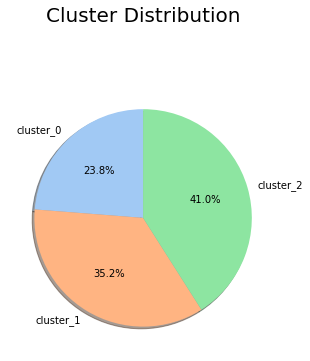

In [39]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:3]
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',colors=colors)
plt.title("Cluster Distribution",position=(0.5,1.2),fontsize=20)

In [40]:
def show_cluster_dist(num_cluster,num_sample=100 ):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['1','2','3,','4','5','6','7','8','9','10','11','12','13','14','15','16',
              '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
              '31', '32', '33', '34',' 35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
              '45', '46', '47', '48', '49', '50'],np.array(Xt[[pred_kmeans3==num_cluster]][i]))
  plt.xlabel("time")
  plt.legend()
  plt.ylim(-6,6)
  plt.show()

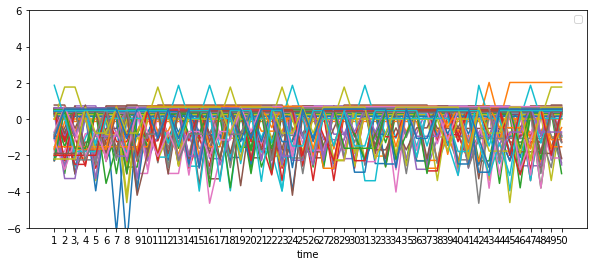

In [41]:
#cluster 0
show_cluster_dist(0)

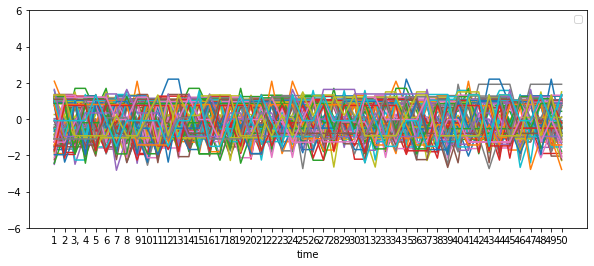

In [42]:
#cluster 1
show_cluster_dist(1)

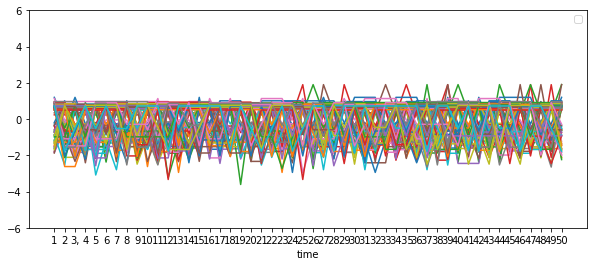

In [43]:
#cluster 2
show_cluster_dist(2)

In [44]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(easy_exp.iloc[:,1:51], easy_exp['km3cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: -0.0013


In [45]:
# Inertia 출력
print(f'Inertia: { model.inertia_}')

Inertia: 14.725060698680096


(-3.0, 3.0)

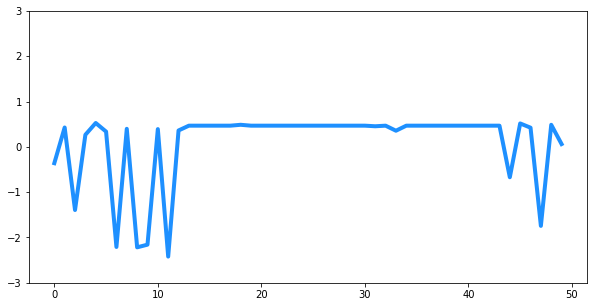

In [47]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[0], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

(-3.0, 3.0)

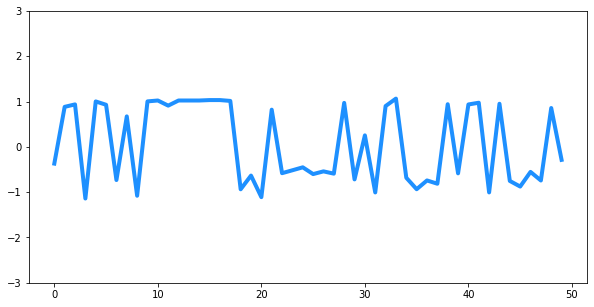

In [48]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[1], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

(-3.0, 3.0)

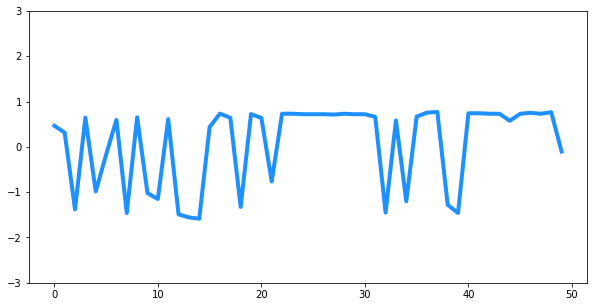

In [49]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[2], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

### - 요약통계량 확인

In [199]:
easy_e = pd.read_csv('/content/gdrive/MyDrive/teamA/클러스터링 결과/final_easy_exp_km3.csv')
easy_e.drop(columns = ['Unnamed: 0'], inplace = True)

In [200]:
he0 = easy_e[easy_e['km3cluster']==0] #클러스터 0
he1 = easy_e[easy_e['km3cluster']==1] #클러스터 1
he2 = easy_e[easy_e['km3cluster']==2] #클러스터 2

##### 클러스터0

In [201]:
aa = he0.iloc[:,1:-1] #a1~a50 나오게 인덱스 조절!
aa

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
7,1,1,2,0,1,1,0,2,0,1,...,2,2,2,2,2,0,2,2,2,2
9,2,1,0,0,1,1,1,1,2,2,...,2,2,2,0,2,2,2,2,2,2
10,0,1,2,2,2,0,1,1,1,1,...,2,0,0,2,2,2,2,2,2,2
15,2,2,2,2,0,1,2,2,2,2,...,2,2,2,2,2,2,2,0,2,2
29,0,1,1,2,2,2,1,1,2,2,...,0,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,2,1,0,1,0,1,0,2,1,...,2,2,2,2,2,2,2,2,2,2
377,1,2,2,0,1,2,0,2,0,1,...,2,2,2,0,2,2,2,2,2,2
379,0,0,0,2,1,1,2,1,1,2,...,0,2,1,1,2,2,0,2,2,2
380,2,2,2,2,2,2,2,2,2,2,...,2,2,1,2,2,2,2,2,2,2


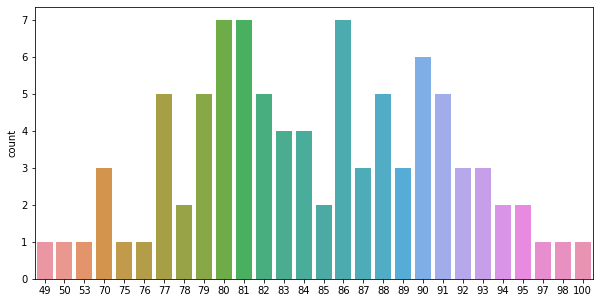

In [208]:
plt.figure(figsize = (10, 5))
sns.countplot(aa.sum(1))

In [209]:
aa.sum(1).mean() #평균 sum

83.7032967032967

In [210]:
aa.sum(1).describe()

count     91.000000
mean      83.703297
std        8.742609
min       49.000000
25%       80.000000
50%       84.000000
75%       90.000000
max      100.000000
dtype: float64

In [211]:
as_1 = aa.std(1)
as_1

7      0.734291
9      0.732900
10     0.699854
15     0.640153
29     0.730949
         ...   
376    0.735402
377    0.702474
379    0.705951
380    0.517451
382    0.626295
Length: 91, dtype: float64

(-1.0, 2.0)

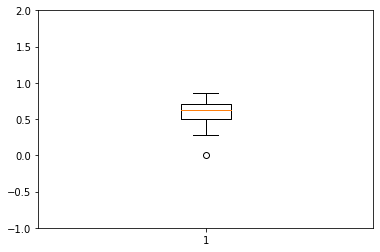

In [213]:
plt.boxplot(as_1)
plt.ylim(-1,2)

In [214]:
as_1.describe()

count    91.000000
mean      0.599159
std       0.139091
min       0.000000
25%       0.500987
50%       0.626295
75%       0.701747
max       0.857143
dtype: float64

In [215]:
aa.sum(1).std()

8.742608948889984

In [216]:
bb = he1.iloc[:,1:-1]
bb

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,2,2,2,2,2,1,2,1,0,1,...,0,1,2,1,2,1,1,1,1,1
8,1,1,0,0,0,1,2,0,1,2,...,2,2,2,2,1,2,2,0,1,1
11,0,1,0,1,2,1,2,0,2,1,...,0,0,0,1,0,2,0,2,1,2
16,2,2,1,1,1,1,2,0,1,1,...,1,2,2,1,2,1,2,2,2,2
17,0,2,0,1,2,1,2,2,1,2,...,2,1,1,1,1,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2,0,0,0,2,2,2,2,0,2,...,0,0,0,2,2,1,0,2,2,2
372,1,0,2,2,2,1,0,0,0,0,...,1,2,2,2,2,1,2,2,2,2
375,1,1,1,1,1,2,1,2,2,0,...,1,0,2,2,2,2,2,2,1,2
378,0,0,1,1,0,2,1,0,2,1,...,2,2,2,2,2,0,2,2,2,2


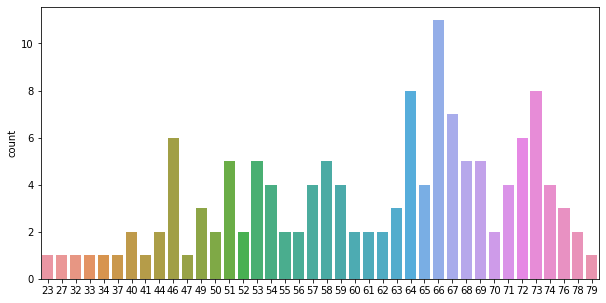

In [219]:
plt.figure(figsize = (10, 5))
sns.countplot(bb.sum(1))

##### 클러스터1

In [217]:
bb.sum(1).mean() 

60.644444444444446

In [218]:
bs_1 = bb.std(1)
bs_1

0      0.652781
8      0.876915
11     0.829064
16     0.638877
17     0.574634
         ...   
370    0.765586
372    0.803309
375    0.912722
378    0.840068
381    0.658074
Length: 135, dtype: float64

In [220]:
bs_1.describe()

count    135.000000
mean       0.734850
std        0.123315
min        0.452205
25%        0.646498
50%        0.740656
75%        0.829064
max        1.006915
dtype: float64

(-1.0, 2.0)

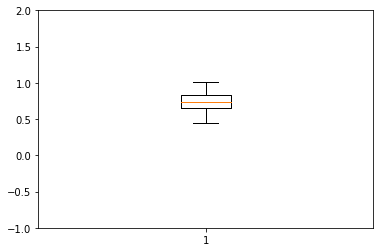

In [222]:
plt.boxplot(bs_1)
plt.ylim(-1,2)

In [223]:
bb.sum(1).std()

11.24852671392262

##### 클러스터2

In [224]:
cc = he2.iloc[:,1:-1]
cc

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
1,2,0,1,2,2,0,1,2,2,2,...,1,2,0,2,2,2,2,1,0,2
2,1,2,2,0,2,0,2,2,2,1,...,1,1,2,2,1,2,2,2,2,0
3,2,0,2,2,2,0,2,1,0,2,...,1,2,0,2,2,2,0,1,2,1
4,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,2,0,2,0
5,0,1,0,0,1,2,2,2,1,2,...,2,0,2,2,1,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2,2,2,1,1,1,2,2,0,1,...,2,1,2,2,2,2,1,2,2,2
364,1,2,2,2,2,2,2,2,2,2,...,2,2,1,1,2,2,1,2,2,1
365,2,2,1,0,2,2,2,2,1,2,...,1,2,2,1,0,1,2,2,2,1
366,1,0,0,0,2,2,1,2,1,2,...,2,2,2,0,0,2,2,1,1,2


In [225]:
cc.sum(1)

1      71
2      77
3      70
4      43
5      74
       ..
362    83
364    76
365    78
366    65
374    74
Length: 157, dtype: int64

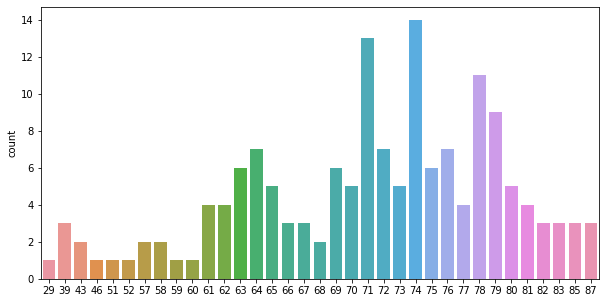

In [226]:
plt.figure(figsize = (10, 5))
sns.countplot(cc.sum(1))

In [227]:
cc.sum(1).mean()

70.6624203821656

In [228]:
cs_1 = cc.std(1)
cs_1

1      0.810392
2      0.734291
3      0.808122
4      0.606428
5      0.814160
         ...   
362    0.592814
364    0.677330
365    0.704504
366    0.762648
374    0.788696
Length: 157, dtype: float64

In [229]:
cs_1.describe()

count    157.000000
mean       0.739762
std        0.117373
min        0.443087
25%        0.665168
50%        0.758355
75%        0.833973
max        0.964894
dtype: float64

(-1.0, 2.0)

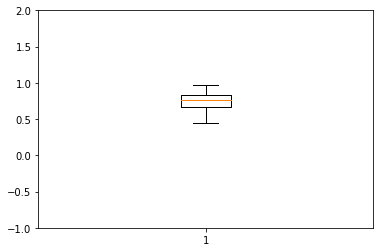

In [231]:
plt.boxplot(cs_1)
plt.ylim(-1,2)

In [232]:
cc.sum(1).mean()

70.6624203821656

## 고난이도

### - 데이터 전처리 및 스케일링

In [98]:
hard_exp.drop(columns = ['Unnamed: 0'], inplace = True)
hard_exp.dropna(inplace=True)
hard_exp.head(3)

,student_id,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,I100008,3,0,0,0,3,4,3,3,0,...,0,3,0,4,3,0,4,3,3,3
1,I101947,3,4,4,4,0,3,4,3,0,...,3,3,4,4,0,3,4,4,0,3
2,I108485,0,3,3,3,3,0,0,3,3,...,0,3,0,0,0,0,0,0,3,3


In [99]:
X=hard_exp.iloc[:,1:51]
X

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,3,0,0,0,3,4,3,3,0,3,...,0,3,0,4,3,0,4,3,3,3
1,3,4,4,4,0,3,4,3,0,0,...,3,3,4,4,0,3,4,4,0,3
2,0,3,3,3,3,0,0,3,3,3,...,0,3,0,0,0,0,0,0,3,3
3,0,0,0,0,3,4,3,4,3,3,...,3,3,4,0,0,5,0,3,0,3
4,3,3,0,3,0,3,0,3,3,3,...,0,3,4,0,0,3,3,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,3,3,3,0,0,0,3,0,3,3,...,4,0,0,3,3,0,3,4,4,3
379,0,4,3,3,0,4,3,3,3,0,...,3,3,3,4,3,3,0,0,0,3
380,3,3,3,3,3,3,3,3,3,3,...,3,0,0,3,3,3,4,0,3,3
381,3,0,4,0,4,3,0,0,3,3,...,4,3,0,0,0,0,3,3,0,3


In [100]:
#스케일링
Xt=TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(hard_exp.iloc[:,1:])

In [101]:
#확인
Xt[0]

array([[ 0.58658846],
       [-1.24650048],
       [-1.24650048],
       [-1.24650048],
       [ 0.58658846],
       [ 1.19761811],
       [ 0.58658846],
       [ 0.58658846],
       [-1.24650048],
       [ 0.58658846],
       [ 0.58658846],
       [-1.24650048],
       [-1.24650048],
       [-1.24650048],
       [-1.24650048],
       [-1.24650048],
       [-1.24650048],
       [-1.24650048],
       [ 0.58658846],
       [ 0.58658846],
       [ 0.58658846],
       [ 0.58658846],
       [ 1.19761811],
       [ 1.19761811],
       [ 1.19761811],
       [ 0.58658846],
       [ 1.19761811],
       [-1.24650048],
       [ 1.19761811],
       [ 1.19761811],
       [ 0.58658846],
       [ 0.58658846],
       [ 0.58658846],
       [ 0.58658846],
       [ 0.58658846],
       [ 0.58658846],
       [-1.24650048],
       [-1.24650048],
       [-1.24650048],
       [-1.24650048],
       [-1.24650048],
       [ 0.58658846],
       [-1.24650048],
       [ 1.19761811],
       [ 0.58658846],
       [-1

In [102]:
#스케일링
Xt=TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(X)

### KMeans 클러스터링

3개의 클러스터로 설정하여 클러스터링 진행했습니다.

In [103]:
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=100, random_state = 22)
model.fit(Xt)
#걸린시간: 1시간

TimeSeriesKMeans(max_iter=100, metric='dtw', random_state=22)

In [104]:
pred_kmeans3=model.predict(Xt)

In [105]:
hard_exp['km3cluster'] = model.labels_

In [106]:
#데이터 저장
hard_exp.to_csv('/content/gdrive/MyDrive/teamA/클러스터링 결과/final_hard_exp_km3.csv')

### - 클러스터 시각화

In [107]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
n_cluster=3
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(pred_kmeans3)[i])

Text(0.5, 1.2, 'Cluster Distribution')

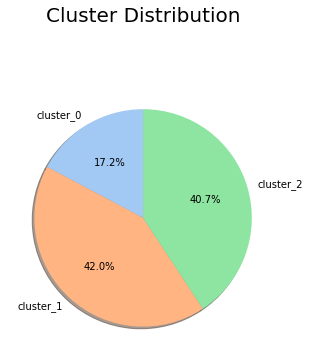

In [108]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:3]
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',colors=colors)
plt.title("Cluster Distribution",position=(0.5,1.2),fontsize=20)

In [109]:
def show_cluster_dist(num_cluster,num_sample=100 ):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['1','2','3,','4','5','6','7','8','9','10','11','12','13','14','15','16',
              '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
              '31', '32', '33', '34',' 35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
              '45', '46', '47', '48', '49', '50'],np.array(Xt[[pred_kmeans3==num_cluster]][i]))
  plt.xlabel("time")
  plt.legend()
  plt.ylim(-6,6)
  plt.show()

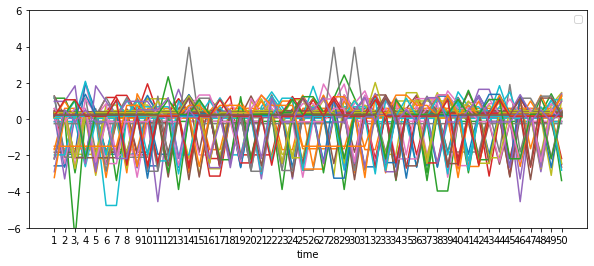

In [110]:
#cluster 0
show_cluster_dist(0)

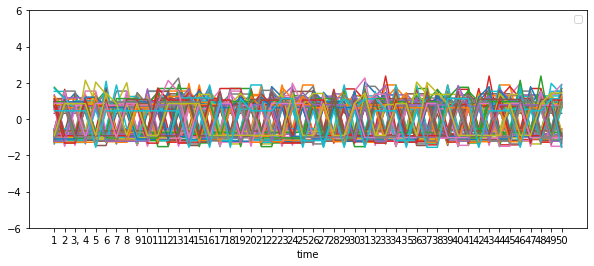

In [111]:
#cluster 1
show_cluster_dist(1)

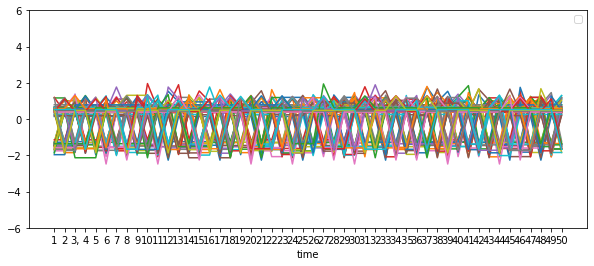

In [112]:
#cluster 2
show_cluster_dist(2)

In [113]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(hard_exp.iloc[:,1:51], hard_exp['km3cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: -0.0115


In [114]:
# Inertia 출력
print(f'Inertia: { model.inertia_}')

Inertia: 11.054724719982154


(-3.0, 3.0)

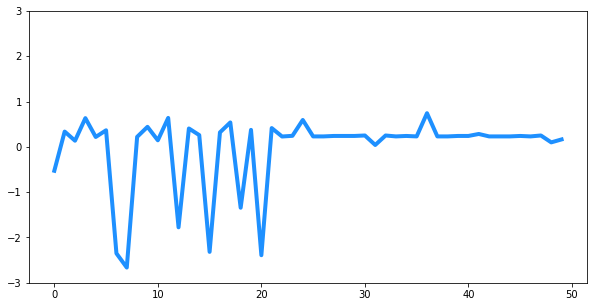

In [115]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[0], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

(-3.0, 3.0)

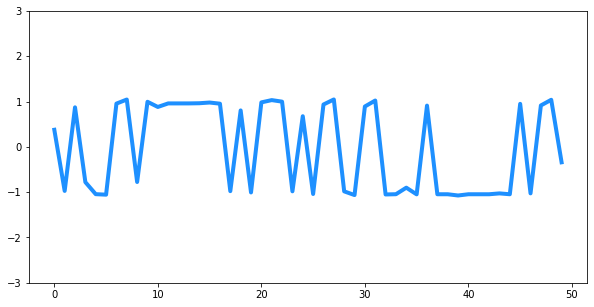

In [116]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[1], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

(-3.0, 3.0)

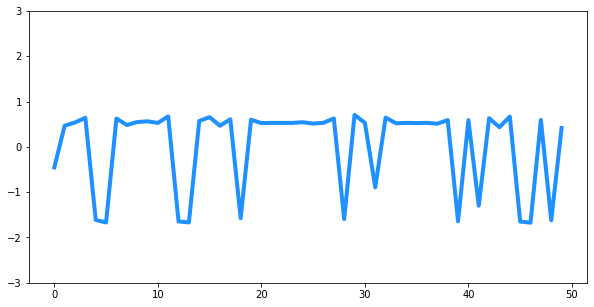

In [117]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[2], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

### - 요약통계량 확인

In [233]:
hard_e = pd.read_csv('/content/gdrive/MyDrive/teamA/클러스터링 결과/final_hard_exp_km3.csv')
hard_e.drop(columns = ['Unnamed: 0'], inplace = True)

In [234]:
he0 = hard_e[hard_e['km3cluster']==0] #클러스터 0
he1 = hard_e[hard_e['km3cluster']==1] #클러스터 1
he2 = hard_e[hard_e['km3cluster']==2] #클러스터 2

##### 클러스터0

In [235]:
aa = he0.iloc[:,1:-1] #a1~a50 나오게 인덱스 조절!
aa

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
7,0,0,3,3,3,3,3,3,3,0,...,3,3,3,4,3,4,3,3,3,3
13,0,3,3,0,0,0,0,0,0,3,...,3,3,3,3,3,3,3,3,3,3
17,4,4,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,4,3,3
27,3,0,3,0,3,0,3,3,0,0,...,3,3,3,3,3,3,3,3,3,3
28,3,3,3,3,3,3,3,3,3,3,...,3,4,4,3,3,0,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0,0,0,0,0,0,0,4,4,3,...,4,3,3,5,3,3,3,3,3,5
350,0,3,4,0,3,3,3,3,3,3,...,3,3,4,4,0,0,3,3,0,3
355,3,4,4,3,3,3,4,0,3,0,...,3,0,3,4,3,3,3,3,3,3
373,0,4,3,4,3,3,0,0,4,4,...,4,5,3,3,3,4,3,4,3,4


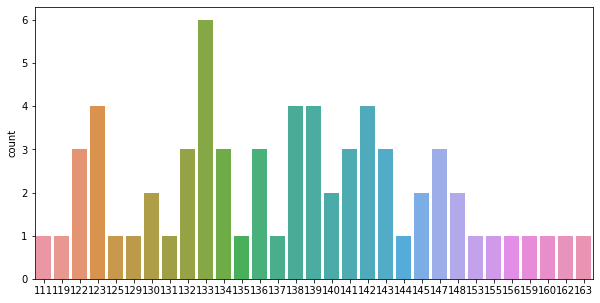

In [236]:
plt.figure(figsize = (10, 5))
sns.countplot(aa.sum(1))

In [237]:
aa.sum(1).mean() #평균 sum

137.8181818181818

In [238]:
aa.sum(1).describe()

count     66.000000
mean     137.818182
std       10.546467
min      111.000000
25%      132.250000
50%      138.000000
75%      143.000000
max      163.000000
dtype: float64

In [239]:
as_1 = aa.std(1)
as_1

7      1.079682
13     1.329262
17     0.788954
27     1.248019
28     0.651842
         ...   
349    1.791249
350    1.236189
355    1.119220
373    1.505907
376    1.079682
Length: 66, dtype: float64

(-1.0, 2.0)

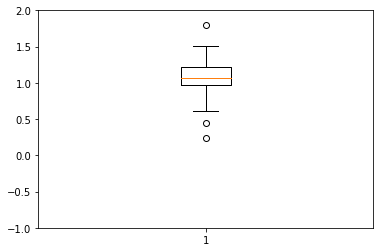

In [240]:
plt.boxplot(as_1)
plt.ylim(-1,2)

In [241]:
as_1.describe()

count    66.000000
mean      1.074036
std       0.246120
min       0.239898
25%       0.963442
50%       1.069045
75%       1.223411
max       1.791249
dtype: float64

In [242]:
aa.sum(1).std()

10.546467277148874

In [243]:
bb = he1.iloc[:,1:-1]
bb

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
4,3,3,0,3,0,3,0,3,3,3,...,0,3,4,0,0,3,3,0,3,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,3,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,3,0,3,0,0,0,0,0,0,3
12,0,3,3,0,0,0,0,0,0,3,...,3,0,0,3,3,0,0,0,0,3
20,3,0,0,3,0,3,3,3,3,3,...,0,0,0,3,3,0,0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,3,0,0,0,0,3,0,3,3,3,...,0,0,0,0,0,0,0,0,3,0
375,0,0,4,4,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
378,3,3,3,0,0,0,3,0,3,3,...,4,0,0,3,3,0,3,4,4,3
381,3,0,4,0,4,3,0,0,3,3,...,4,3,0,0,0,0,3,3,0,3


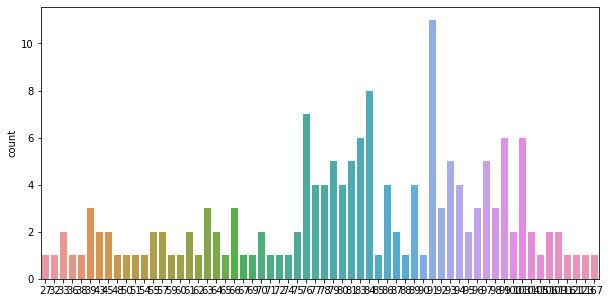

In [244]:
plt.figure(figsize = (10, 5))
sns.countplot(bb.sum(1))

##### 클러스터1

In [245]:
bb.sum(1).mean() 

81.24844720496894

In [246]:
bs_1 = bb.std(1)
bs_1

4      1.541799
8      1.255356
11     1.329262
12     1.504280
20     1.541799
         ...   
370    1.559827
375    1.564922
378    1.597064
381    1.702819
382    1.679286
Length: 161, dtype: float64

In [247]:
bs_1.describe()

count    161.000000
mean       1.543238
std        0.124537
min        0.688388
25%        1.504280
50%        1.541799
75%        1.608777
max        1.869301
dtype: float64

(-1.0, 2.0)

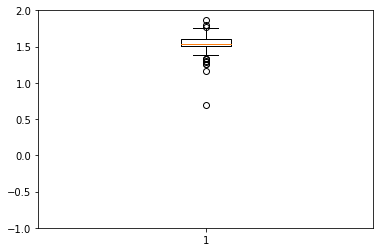

In [248]:
plt.boxplot(bs_1)
plt.ylim(-1,2)

In [249]:
bb.sum(1).std()

20.193449140717835

##### 클러스터2

In [250]:
cc = he2.iloc[:,1:-1]
cc

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,3,0,0,0,3,4,3,3,0,3,...,0,3,0,4,3,0,4,3,3,3
1,3,4,4,4,0,3,4,3,0,0,...,3,3,4,4,0,3,4,4,0,3
2,0,3,3,3,3,0,0,3,3,3,...,0,3,0,0,0,0,0,0,3,3
3,0,0,0,0,3,4,3,4,3,3,...,3,3,4,0,0,5,0,3,0,3
5,0,0,4,0,3,0,3,0,0,0,...,3,3,0,0,3,3,3,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,0,3,3,3,3,0,0,0,0,3,...,0,0,4,4,4,4,4,0,4,4
374,0,0,3,0,0,0,0,3,3,3,...,3,3,3,3,0,3,3,0,3,0
377,3,3,0,0,0,3,0,3,3,3,...,0,0,3,3,3,3,3,0,4,3
379,0,4,3,3,0,4,3,3,3,0,...,3,3,3,4,3,3,0,0,0,3


In [251]:
cc.sum(1)

0      102
1      118
2       93
3      121
5       98
      ... 
372    113
374     96
377    103
379    103
380    119
Length: 156, dtype: int64

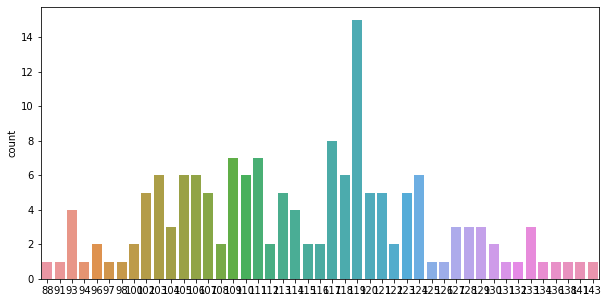

In [252]:
plt.figure(figsize = (10, 5))
sns.countplot(cc.sum(1))

In [253]:
cc.sum(1).mean()

114.42307692307692

In [254]:
cs_1 = cc.std(1)
cs_1

0      1.653197
1      1.638317
2      1.470943
3      1.679286
5      1.497753
         ...   
372    1.536096
374    1.454620
377    1.517382
379    1.517382
380    1.291890
Length: 156, dtype: float64

In [255]:
cs_1.describe()

count    156.000000
mean       1.405573
std        0.124328
min        1.051529
25%        1.326188
50%        1.409009
75%        1.474822
max        1.724848
dtype: float64

(-1.0, 2.0)

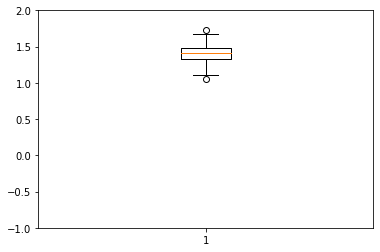

In [256]:
plt.boxplot(cs_1)
plt.ylim(-1,2)

In [257]:
cc.sum(1).mean()

114.42307692307692

# 3. 정규분포 클러스터링

## 저﹒중난이도

### - 데이터 전처리 및 스케일링

In [118]:
easy_norm.drop(columns = ['Unnamed: 0'], inplace = True)
easy_norm.dropna(inplace=True)
easy_norm.head(3)

,student_id,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,I100008,2,1,0,1,1,2,1,2,0,...,2,2,2,2,2,0,2,0,0,1
1,I101947,1,2,2,2,2,2,1,0,0,...,0,2,2,0,0,2,2,0,1,0
2,I108485,1,2,1,1,1,0,0,0,2,...,1,0,2,0,0,2,1,0,2,2


In [119]:
X=easy_norm.iloc[:,1:51]
X

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,2,1,0,1,1,2,1,2,0,2,...,2,2,2,2,2,0,2,0,0,1
1,1,2,2,2,2,2,1,0,0,1,...,0,2,2,0,0,2,2,0,1,0
2,1,2,1,1,1,0,0,0,2,2,...,1,0,2,0,0,2,1,0,2,2
3,0,1,1,2,2,2,1,2,2,1,...,0,2,0,2,2,2,2,1,2,2
4,1,2,2,0,2,2,0,1,1,0,...,2,1,1,1,1,1,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2,1,2,2,1,0,2,2,1,2,...,2,2,2,2,2,2,0,2,1,2
379,2,2,1,2,2,2,1,1,1,1,...,1,1,1,1,2,2,1,1,2,1
380,0,1,1,1,1,2,1,1,0,1,...,2,2,0,1,2,0,1,2,2,2
381,2,2,2,2,2,2,2,2,1,0,...,2,0,2,1,2,2,2,1,2,0


In [120]:
#스케일링
Xt=TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(easy_norm.iloc[:,1:])

In [121]:
#확인
Xt[0]

array([[ 0.63089327],
       [-0.80295507],
       [-2.23680341],
       [-0.80295507],
       [-0.80295507],
       [ 0.63089327],
       [-0.80295507],
       [ 0.63089327],
       [-2.23680341],
       [ 0.63089327],
       [ 0.63089327],
       [-0.80295507],
       [ 0.63089327],
       [ 0.63089327],
       [-0.80295507],
       [-0.80295507],
       [ 0.63089327],
       [ 0.63089327],
       [-2.23680341],
       [-0.80295507],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [-0.80295507],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [ 0.63089327],
       [-2

In [122]:
#스케일링
Xt=TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(X)

### KMeans 클러스터링

3개의 클러스터로 설정하여 클러스터링 진행했습니다.

In [123]:
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=100, random_state = 22)
model.fit(Xt)
#걸린시간: 1시간

TimeSeriesKMeans(max_iter=100, metric='dtw', random_state=22)

In [124]:
pred_kmeans3=model.predict(Xt)

In [125]:
easy_norm['km3cluster'] = model.labels_

In [126]:
#데이터 저장
easy_norm.to_csv('/content/gdrive/MyDrive/teamA/클러스터링 결과/final_easy_norm_km3.csv')

### - 클러스터 시각화

In [127]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
n_cluster=3
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(pred_kmeans3)[i])

Text(0.5, 1.2, 'Cluster Distribution')

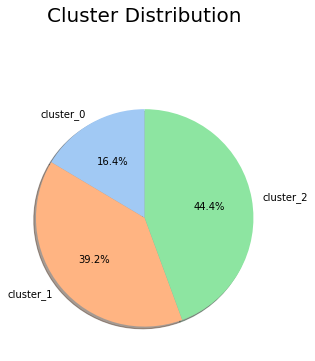

In [128]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:3]
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',colors=colors)
plt.title("Cluster Distribution",position=(0.5,1.2),fontsize=20)

In [129]:
def show_cluster_dist(num_cluster,num_sample=100 ):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['1','2','3,','4','5','6','7','8','9','10','11','12','13','14','15','16',
              '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
              '31', '32', '33', '34',' 35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
              '45', '46', '47', '48', '49', '50'],np.array(Xt[[pred_kmeans3==num_cluster]][i]))
  plt.xlabel("time")
  plt.legend()
  plt.ylim(-6,6)
  plt.show()

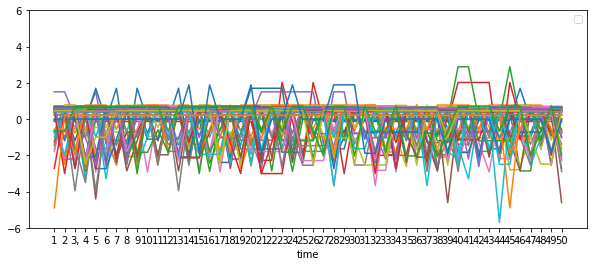

In [130]:
#cluster 0
show_cluster_dist(0)

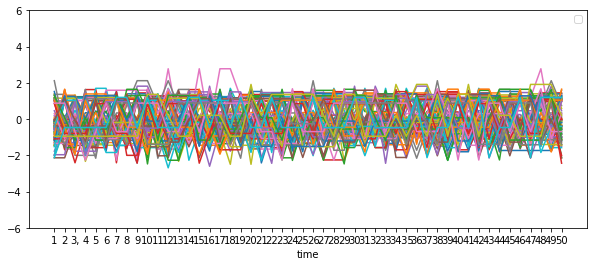

In [131]:
#cluster 1
show_cluster_dist(1)

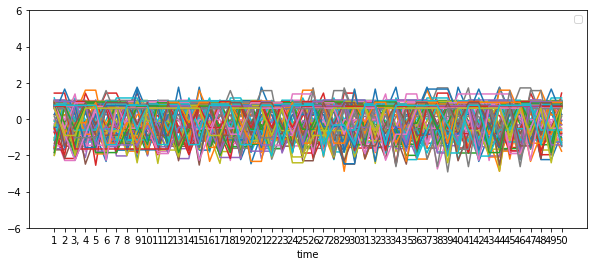

In [132]:
#cluster 2
show_cluster_dist(2)

In [133]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(easy_norm.iloc[:,1:51], easy_norm['km3cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: -0.0006


In [134]:
# Inertia 출력
print(f'Inertia: { model.inertia_}')

Inertia: 14.52062067523605


(-3.0, 3.0)

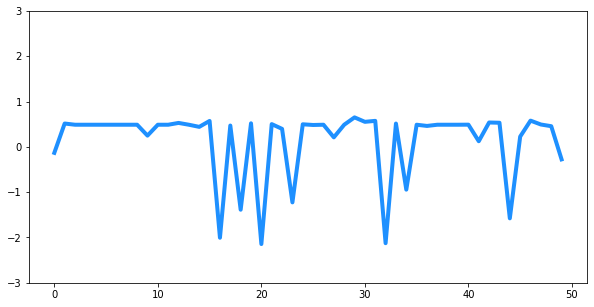

In [135]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[0], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

(-3.0, 3.0)

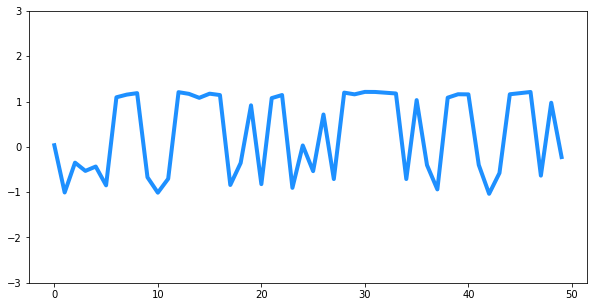

In [136]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[1], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

(-3.0, 3.0)

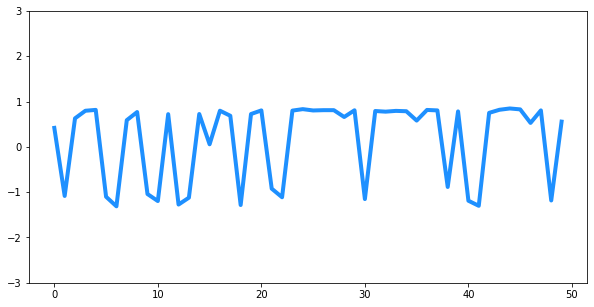

In [137]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[2], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

### - 요약통계량 확인

In [258]:
easy_n = pd.read_csv('/content/gdrive/MyDrive/teamA/클러스터링 결과/final_easy_norm_km3.csv')
easy_n.drop(columns = ['Unnamed: 0'], inplace = True)

In [262]:
hn0 = easy_n[easy_n['km3cluster']==0] #클러스터 0
hn1 = easy_n[easy_n['km3cluster']==1] #클러스터 1
hn2 = easy_n[easy_n['km3cluster']==2] #클러스터 2

##### 클러스터0

In [263]:
aa = hn0.iloc[:,1:-1] #a1~a50 나오게 인덱스 조절!
aa

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
15,1,2,2,2,2,2,0,2,2,1,...,2,0,2,2,2,1,1,2,2,1
21,1,2,2,1,2,0,2,1,2,2,...,2,1,1,2,2,2,2,1,1,1
22,2,1,2,2,2,1,1,1,2,2,...,2,2,2,2,2,0,0,2,2,2
25,2,2,2,2,2,2,1,2,1,2,...,2,2,2,2,2,2,1,2,1,2
38,2,2,2,2,2,1,2,1,0,2,...,0,2,2,2,1,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2,2,2,0,1,1,2,2,2,2,...,2,2,2,2,2,2,1,0,0,2
348,2,2,2,2,2,2,2,2,2,2,...,2,2,1,2,1,2,2,2,2,2
357,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,0,1
373,1,2,2,2,2,2,2,2,2,2,...,2,2,2,2,1,2,2,2,2,2


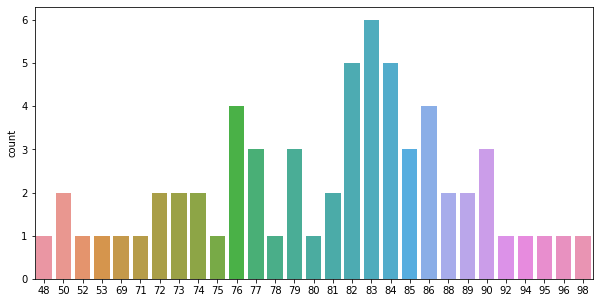

In [264]:
plt.figure(figsize = (10, 5))
sns.countplot(aa.sum(1))

In [265]:
aa.sum(1).mean() #평균 sum

79.74603174603175

In [266]:
aa.sum(1).describe()

count    63.000000
mean     79.746032
std      10.675520
min      48.000000
25%      76.000000
50%      82.000000
75%      85.500000
max      98.000000
dtype: float64

In [267]:
as_1 = aa.std(1)
as_1

15     0.705951
21     0.705951
22     0.607437
25     0.404061
38     0.705951
         ...   
345    0.683329
348    0.494872
357    0.534522
373    0.197949
382    0.735125
Length: 63, dtype: float64

(-1.0, 2.0)

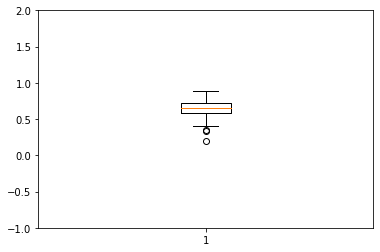

In [268]:
plt.boxplot(as_1)
plt.ylim(-1,2)

In [269]:
as_1.describe()

count    63.000000
mean      0.639133
std       0.134293
min       0.197949
25%       0.589011
50%       0.658074
75%       0.719028
max       0.884331
dtype: float64

In [270]:
aa.sum(1).std()

10.675519559719033

In [271]:
bb = hn1.iloc[:,1:-1]
bb

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
4,1,2,2,0,2,2,0,1,1,0,...,2,1,1,1,1,1,2,2,1,2
5,1,2,0,1,2,1,1,1,1,0,...,1,2,2,2,0,1,2,1,2,1
7,2,1,2,1,2,1,2,1,1,0,...,1,1,1,2,1,1,2,2,2,0
8,0,2,0,2,2,0,0,0,0,1,...,0,2,2,0,1,0,0,0,0,0
9,2,1,2,1,2,2,2,2,1,2,...,1,2,0,1,2,1,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2,2,0,1,1,1,2,2,1,2,...,0,0,0,0,0,0,1,2,2,2
375,0,1,0,1,0,1,0,1,2,1,...,1,1,2,1,2,2,1,2,2,1
377,1,2,0,1,1,0,1,1,2,0,...,0,2,1,1,2,2,0,1,2,2
379,2,2,1,2,2,2,1,1,1,1,...,1,1,1,1,2,2,1,1,2,1


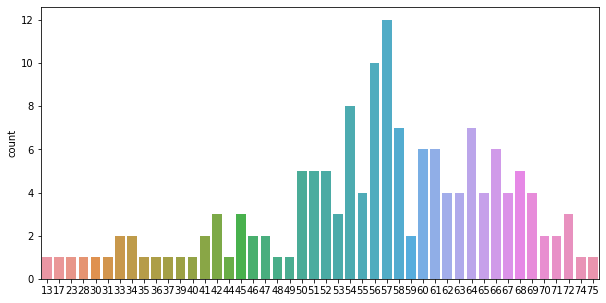

In [272]:
plt.figure(figsize = (10, 5))
sns.countplot(bb.sum(1))

##### 클러스터1

In [273]:
bb.sum(1).mean() 

55.586666666666666

In [274]:
bs_1 = bb.std(1)
bs_1

4      0.781417
5      0.739829
7      0.614452
8      0.819158
9      0.620730
         ...   
372    0.886405
375    0.666701
377    0.728711
379    0.609114
380    0.755929
Length: 150, dtype: float64

In [275]:
bs_1.describe()

count    150.000000
mean       0.724966
std        0.111257
min        0.478518
25%        0.629463
50%        0.735957
75%        0.812839
max        0.968904
dtype: float64

(-1.0, 2.0)

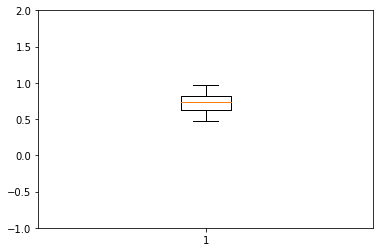

In [276]:
plt.boxplot(bs_1)
plt.ylim(-1,2)

In [277]:
bb.sum(1).std()

11.277575698993665

##### 클러스터2

In [278]:
cc = hn2.iloc[:,1:-1]
cc

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,2,1,0,1,1,2,1,2,0,2,...,2,2,2,2,2,0,2,0,0,1
1,1,2,2,2,2,2,1,0,0,1,...,0,2,2,0,0,2,2,0,1,0
2,1,2,1,1,1,0,0,0,2,2,...,1,0,2,0,0,2,1,0,2,2
3,0,1,1,2,2,2,1,2,2,1,...,0,2,0,2,2,2,2,1,2,2
6,1,1,1,2,2,2,1,2,2,2,...,1,1,1,2,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,1,1,1,1,1,1,1,0,0,1,...,2,1,2,0,2,0,1,0,0,0
374,0,0,0,2,2,1,2,2,2,2,...,2,2,1,1,1,2,2,2,1,2
376,2,2,1,2,1,0,2,1,1,1,...,1,2,1,2,1,1,2,2,2,2
378,2,1,2,2,1,0,2,2,1,2,...,2,2,2,2,2,2,0,2,1,2


In [279]:
cc.sum(1)

0      78
1      71
2      55
3      67
6      73
       ..
371    36
374    74
376    71
378    66
381    76
Length: 170, dtype: int64

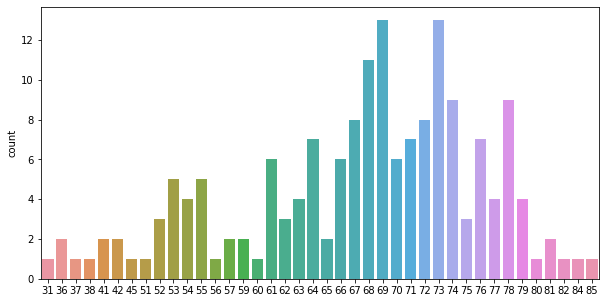

In [280]:
plt.figure(figsize = (10, 5))
sns.countplot(cc.sum(1))

In [281]:
cc.sum(1).mean()

66.7235294117647

In [282]:
cs_1 = cc.std(1)
cs_1

0      0.704504
1      0.810392
2      0.886405
3      0.847806
6      0.676425
         ...   
371    0.671277
374    0.646498
376    0.609114
378    0.819158
381    0.706818
Length: 170, dtype: float64

In [283]:
cs_1.describe()

count    170.000000
mean       0.764454
std        0.110725
min        0.462910
25%        0.682799
50%        0.774194
75%        0.857143
max        0.964894
dtype: float64

(-1.0, 2.0)

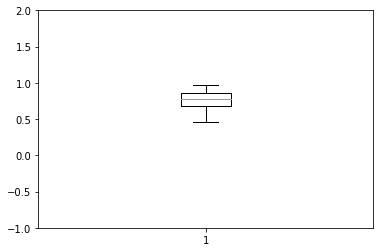

In [284]:
plt.boxplot(cs_1)
plt.ylim(-1,2)

In [285]:
cc.sum(1).mean()

66.7235294117647

## 고난이도

### - 데이터 전처리 및 스케일링

In [138]:
hard_norm.drop(columns = ['Unnamed: 0'], inplace = True)
hard_norm.dropna(inplace=True)
hard_norm.head(3)

,student_id,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,I100008,4,0,3,3,0,0,3,0,4,...,3,3,0,3,3,3,4,0,3,0
1,I101947,0,3,3,3,4,3,4,3,0,...,4,3,4,3,4,0,3,3,3,3
2,I108485,0,0,0,0,0,0,3,3,4,...,3,3,3,3,3,0,3,3,3,3


In [139]:
X=hard_norm.iloc[:,1:51]
X

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,4,0,3,3,0,0,3,0,4,0,...,3,3,0,3,3,3,4,0,3,0
1,0,3,3,3,4,3,4,3,0,3,...,4,3,4,3,4,0,3,3,3,3
2,0,0,0,0,0,0,3,3,4,4,...,3,3,3,3,3,0,3,3,3,3
3,0,4,3,3,3,4,3,0,3,3,...,3,0,3,3,4,0,3,0,3,4
4,3,3,3,0,3,3,3,3,3,3,...,4,4,0,0,0,4,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,4,0,0,0,0,0,3,0,4,3,...,0,4,0,0,0,3,4,3,3,3
379,3,3,3,3,0,3,0,3,3,3,...,0,0,0,0,3,0,0,0,3,3
380,3,0,3,3,3,3,3,3,3,3,...,5,3,3,3,3,4,0,0,3,3
381,3,4,3,0,3,4,3,3,4,3,...,4,4,3,0,3,3,5,3,3,0


In [140]:
#스케일링
Xt=TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(hard_norm.iloc[:,1:])

In [141]:
#확인
Xt[0]

array([[ 1.18100594],
       [-1.35879178],
       [ 0.54605651],
       [ 0.54605651],
       [-1.35879178],
       [-1.35879178],
       [ 0.54605651],
       [-1.35879178],
       [ 1.18100594],
       [-1.35879178],
       [ 1.18100594],
       [-1.35879178],
       [ 1.18100594],
       [ 0.54605651],
       [-1.35879178],
       [ 0.54605651],
       [ 0.54605651],
       [ 0.54605651],
       [ 0.54605651],
       [-1.35879178],
       [-1.35879178],
       [-1.35879178],
       [-1.35879178],
       [ 1.18100594],
       [ 0.54605651],
       [ 0.54605651],
       [ 0.54605651],
       [-1.35879178],
       [ 0.54605651],
       [ 0.54605651],
       [ 1.18100594],
       [ 0.54605651],
       [ 1.18100594],
       [ 0.54605651],
       [ 0.54605651],
       [ 0.54605651],
       [-1.35879178],
       [ 0.54605651],
       [-1.35879178],
       [ 0.54605651],
       [ 0.54605651],
       [ 0.54605651],
       [-1.35879178],
       [ 0.54605651],
       [ 0.54605651],
       [ 0

In [142]:
#스케일링
Xt=TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(X)

### KMeans 클러스터링

3개의 클러스터로 설정하여 클러스터링 진행했습니다.

In [143]:
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=100, random_state = 22)
model.fit(Xt)
#걸린시간: 1시간

TimeSeriesKMeans(max_iter=100, metric='dtw', random_state=22)

In [144]:
pred_kmeans3=model.predict(Xt)

In [145]:
hard_norm['km3cluster'] = model.labels_

In [146]:
#데이터 저장
hard_norm.to_csv('/content/gdrive/MyDrive/teamA/클러스터링 결과/final_hard_norm_km3.csv')

### - 클러스터 시각화

In [147]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
n_cluster=3
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(pred_kmeans3)[i])

Text(0.5, 1.2, 'Cluster Distribution')

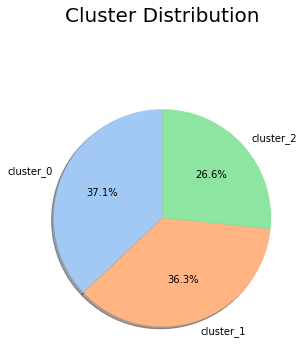

In [148]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:3]
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',colors=colors)
plt.title("Cluster Distribution",position=(0.5,1.2),fontsize=20)

In [149]:
def show_cluster_dist(num_cluster,num_sample=100 ):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['1','2','3,','4','5','6','7','8','9','10','11','12','13','14','15','16',
              '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
              '31', '32', '33', '34',' 35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
              '45', '46', '47', '48', '49', '50'],np.array(Xt[[pred_kmeans3==num_cluster]][i]))
  plt.xlabel("time")
  plt.legend()
  plt.ylim(-6,6)
  plt.show()

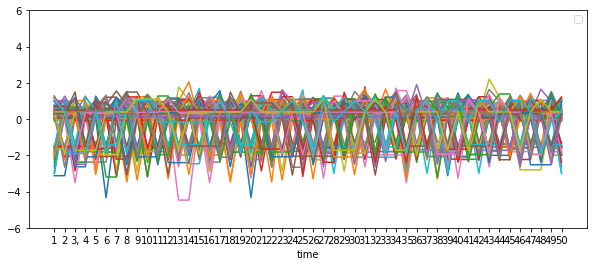

In [150]:
#cluster 0
show_cluster_dist(0)

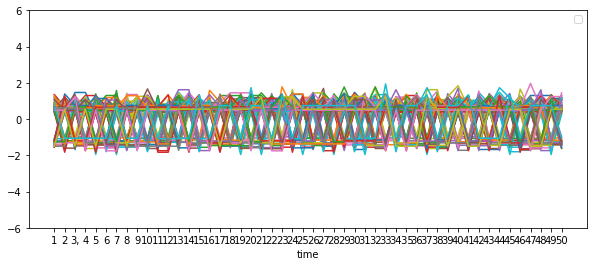

In [151]:
#cluster 1
show_cluster_dist(1)

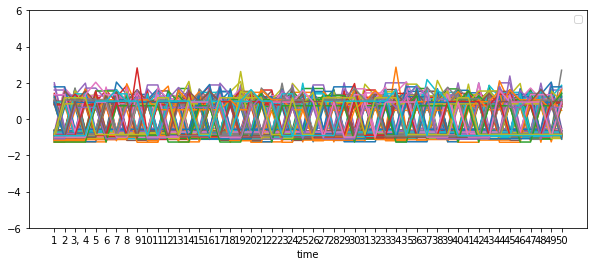

In [152]:
#cluster 2
show_cluster_dist(2)

In [153]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(hard_norm.iloc[:,1:51], hard_norm['km3cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0281


In [154]:
# Inertia 출력
print(f'Inertia: { model.inertia_}')

Inertia: 10.854924518935677


(-3.0, 3.0)

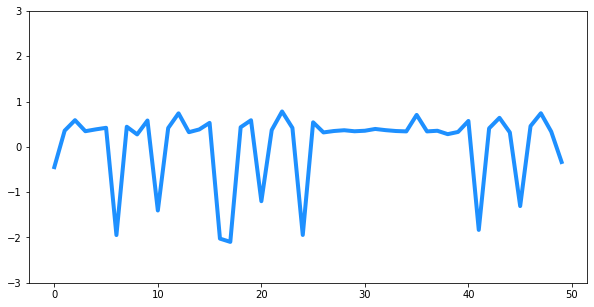

In [155]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[0], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

(-3.0, 3.0)

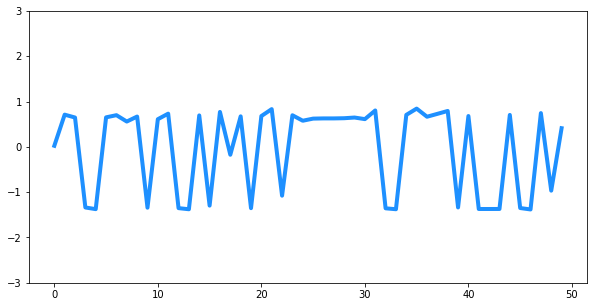

In [156]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[1], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

(-3.0, 3.0)

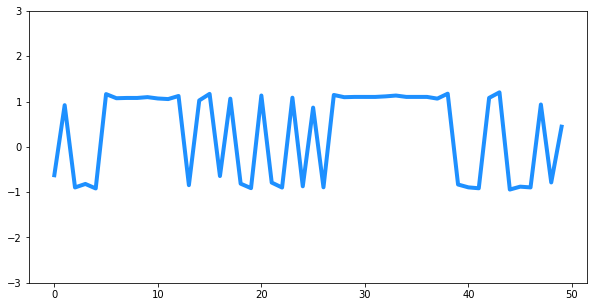

In [157]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[2], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

### - 요약통계량 확인

In [286]:
hard_n = pd.read_csv('/content/gdrive/MyDrive/teamA/클러스터링 결과/final_hard_norm_km3.csv')
hard_n.drop(columns = ['Unnamed: 0'], inplace = True)

In [287]:
hn0 = hard_n[hard_n['km3cluster']==0] #클러스터 0
hn1 = hard_n[hard_n['km3cluster']==1] #클러스터 1
hn2 = hard_n[hard_n['km3cluster']==2] #클러스터 2

##### 클러스터0

In [288]:
aa = hn0.iloc[:,1:-1] #a1~a50 나오게 인덱스 조절!
aa

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
1,0,3,3,3,4,3,4,3,0,3,...,4,3,4,3,4,0,3,3,3,3
2,0,0,0,0,0,0,3,3,4,4,...,3,3,3,3,3,0,3,3,3,3
3,0,4,3,3,3,4,3,0,3,3,...,3,0,3,3,4,0,3,0,3,4
6,3,3,3,0,3,3,4,3,3,3,...,4,4,3,3,3,3,3,3,3,3
9,3,0,3,3,4,0,3,3,3,3,...,3,3,0,3,4,0,3,5,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,4,3,3,3,3,3,0,3,3,3,...,0,0,0,0,0,3,0,3,0,3
376,4,3,0,0,3,0,3,3,3,0,...,3,4,4,3,0,0,3,3,4,0
379,3,3,3,3,0,3,0,3,3,3,...,0,0,0,0,3,0,0,0,3,3
380,3,0,3,3,3,3,3,3,3,3,...,5,3,3,3,3,4,0,0,3,3


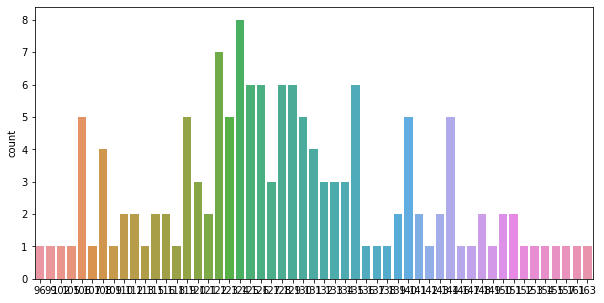

In [289]:
plt.figure(figsize = (10, 5))
sns.countplot(aa.sum(1))

In [290]:
aa.sum(1).mean() #평균 sum

128.44366197183098

In [291]:
aa.sum(1).describe()

count    142.000000
mean     128.443662
std       13.322793
min       96.000000
25%      122.000000
50%      128.000000
75%      135.750000
max      163.000000
dtype: float64

In [292]:
as_1 = aa.std(1)
as_1

1      1.309307
2      1.555110
3      1.492977
6      1.371577
9      1.470804
         ...   
375    1.309307
376    1.541799
379    1.409009
380    1.358420
381    1.271990
Length: 142, dtype: float64

(-1.0, 2.0)

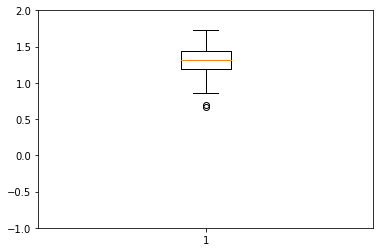

In [293]:
plt.boxplot(as_1)
plt.ylim(-1,2)

In [294]:
as_1.describe()

count    142.000000
mean       1.291186
std        0.207220
min        0.668840
25%        1.184973
50%        1.309307
75%        1.440758
max        1.735700
dtype: float64

In [295]:
aa.sum(1).std()

13.322792632032229

In [296]:
bb = hn1.iloc[:,1:-1]
bb

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,4,0,3,3,0,0,3,0,4,0,...,3,3,0,3,3,3,4,0,3,0
7,0,4,3,3,3,4,3,3,0,0,...,0,3,0,0,0,0,4,3,0,0
12,3,0,0,0,3,0,0,0,0,3,...,0,0,4,0,0,0,3,3,4,3
13,4,3,3,3,3,3,0,3,3,3,...,3,3,3,0,3,0,0,0,0,0
18,3,0,0,0,3,0,3,3,0,3,...,0,0,4,3,4,0,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0,3,0,0,0,3,0,3,0,3,...,0,3,3,4,0,3,0,0,0,0
358,3,0,0,3,4,4,3,0,3,0,...,3,3,3,0,3,0,3,3,3,3
361,3,0,3,3,3,3,0,3,0,4,...,3,3,0,3,3,3,0,3,0,3
371,3,3,3,0,3,3,0,0,3,0,...,0,0,3,3,0,3,0,0,3,3


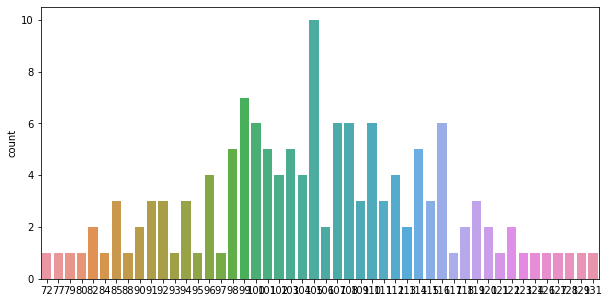

In [297]:
plt.figure(figsize = (10, 5))
sns.countplot(bb.sum(1))

##### 클러스터1

In [298]:
bb.sum(1).mean() 

104.79136690647482

In [299]:
bs_1 = bb.std(1)
bs_1

0      1.590918
7      1.690309
12     1.614223
13     1.477588
18     1.687408
         ...   
356    1.567658
358    1.420549
361    1.471359
371    1.493387
377    1.631951
Length: 139, dtype: float64

In [300]:
bs_1.describe()

count    139.000000
mean       1.554780
std        0.111643
min        1.281581
25%        1.477588
50%        1.555110
75%        1.607444
max        1.918333
dtype: float64

(-1.0, 2.0)

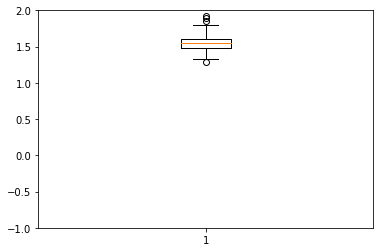

In [301]:
plt.boxplot(bs_1)
plt.ylim(-1,2)

In [302]:
bb.sum(1).std()

11.218821413817441

##### 클러스터2

In [303]:
cc = hn2.iloc[:,1:-1]
cc

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
4,3,3,3,0,3,3,3,3,3,3,...,4,4,0,0,0,4,0,0,3,3
5,0,0,0,0,0,0,3,3,3,4,...,4,4,3,3,3,3,3,3,0,3
8,3,0,0,3,0,0,0,3,3,0,...,0,0,4,0,3,3,0,0,0,3
10,0,0,0,0,4,3,0,0,3,0,...,3,0,3,4,3,0,0,0,4,0
11,3,0,0,0,0,0,0,0,0,0,...,0,3,0,3,3,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0,3,3,3,3,3,0,0,3,0,...,0,0,3,0,3,0,0,3,3,0
372,0,3,3,3,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
374,0,0,0,0,3,3,3,3,3,0,...,0,0,0,0,0,0,0,0,0,0
378,4,0,0,0,0,0,3,0,4,3,...,0,4,0,0,0,3,4,3,3,3


In [304]:
cc.sum(1)

4       87
5       97
8       61
10      87
11      30
      ... 
370     70
372     63
374     72
378     87
382    164
Length: 102, dtype: int64

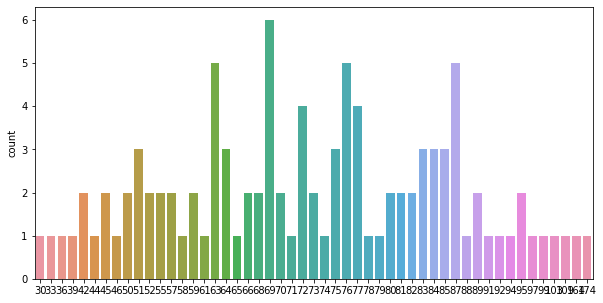

In [305]:
plt.figure(figsize = (10, 5))
sns.countplot(cc.sum(1))

In [306]:
cc.sum(1).mean()

72.73529411764706

In [307]:
cs_1 = cc.std(1)
cs_1

4      1.575449
5      1.557208
8      1.515767
10     1.723902
11     1.212183
         ...   
370    1.538619
372    1.495708
374    1.592841
378    1.793526
382    0.881557
Length: 102, dtype: float64

In [308]:
cs_1.describe()

count    102.000000
mean       1.561221
std        0.166914
min        0.543609
25%        1.515363
50%        1.585199
75%        1.636725
max        1.845126
dtype: float64

(-1.0, 2.0)

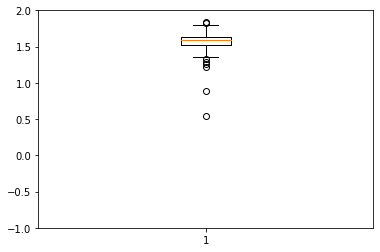

In [309]:
plt.boxplot(cs_1)
plt.ylim(-1,2)

In [310]:
cc.sum(1).mean()

72.73529411764706

# 4. 함수의 극한 클러스터링

## 저﹒중난이도

### - 데이터 전처리 및 스케일링

In [158]:
easy_fx.drop(columns = ['Unnamed: 0'], inplace = True)
easy_fx.dropna(inplace=True)
easy_fx.head(3)

,student_id,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,I100008,2,0,2,1,0,2,0,0,1,...,1,2,1,2,0,2,2,0,1,2
1,I101947,2,2,2,2,2,2,2,2,1,...,2,2,2,0,0,1,2,2,2,2
2,I108485,2,2,0,1,1,2,2,2,2,...,1,2,2,0,2,1,1,2,0,2


In [159]:
X=easy_fx.iloc[:,1:51]
X

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,2,0,2,1,0,2,0,0,1,2,...,1,2,1,2,0,2,2,0,1,2
1,2,2,2,2,2,2,2,2,1,2,...,2,2,2,0,0,1,2,2,2,2
2,2,2,0,1,1,2,2,2,2,1,...,1,2,2,0,2,1,1,2,0,2
3,0,1,0,2,1,1,2,0,2,2,...,2,1,1,2,1,1,2,2,1,0
4,1,0,1,0,0,0,1,1,1,1,...,0,0,2,2,2,0,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0,0,1,1,1,1,1,0,1,0,...,1,1,2,1,1,2,2,1,2,2
379,0,2,1,0,2,1,2,1,1,1,...,2,1,0,2,1,1,2,1,1,2
380,2,0,2,2,0,1,1,0,1,1,...,1,0,2,2,2,2,2,2,2,2
381,2,2,2,1,2,2,1,2,1,1,...,1,2,2,2,1,2,1,0,1,2


In [160]:
#스케일링
Xt=TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(easy_fx.iloc[:,1:])

In [161]:
#확인
Xt[0]

array([[ 1.01913032],
       [-1.29707495],
       [ 1.01913032],
       [-0.13897232],
       [-1.29707495],
       [ 1.01913032],
       [-1.29707495],
       [-1.29707495],
       [-0.13897232],
       [ 1.01913032],
       [-0.13897232],
       [-1.29707495],
       [ 1.01913032],
       [-1.29707495],
       [ 1.01913032],
       [-1.29707495],
       [ 1.01913032],
       [ 1.01913032],
       [-1.29707495],
       [-1.29707495],
       [-0.13897232],
       [ 1.01913032],
       [-0.13897232],
       [ 1.01913032],
       [ 1.01913032],
       [-0.13897232],
       [-0.13897232],
       [ 1.01913032],
       [ 1.01913032],
       [ 1.01913032],
       [ 1.01913032],
       [ 1.01913032],
       [-1.29707495],
       [-1.29707495],
       [ 1.01913032],
       [-0.13897232],
       [-1.29707495],
       [-0.13897232],
       [-1.29707495],
       [-1.29707495],
       [-0.13897232],
       [ 1.01913032],
       [-0.13897232],
       [ 1.01913032],
       [-1.29707495],
       [ 1

In [162]:
#스케일링
Xt=TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(X)

### KMeans 클러스터링

3개의 클러스터로 설정하여 클러스터링 진행했습니다.

In [163]:
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=100, random_state = 22)
model.fit(Xt)
#걸린시간: 1시간

TimeSeriesKMeans(max_iter=100, metric='dtw', random_state=22)

In [164]:
pred_kmeans3=model.predict(Xt)

In [166]:
easy_fx['km3cluster'] = model.labels_

In [167]:
#데이터 저장
easy_fx.to_csv('/content/gdrive/MyDrive/teamA/클러스터링 결과/final_easy_fx_km3.csv')

### - 클러스터 시각화

In [168]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
n_cluster=3
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(pred_kmeans3)[i])

Text(0.5, 1.2, 'Cluster Distribution')

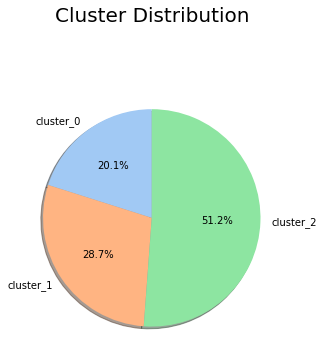

In [169]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:3]
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',colors=colors)
plt.title("Cluster Distribution",position=(0.5,1.2),fontsize=20)

In [170]:
def show_cluster_dist(num_cluster,num_sample=100 ):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['1','2','3,','4','5','6','7','8','9','10','11','12','13','14','15','16',
              '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
              '31', '32', '33', '34',' 35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
              '45', '46', '47', '48', '49', '50'],np.array(Xt[[pred_kmeans3==num_cluster]][i]))
  plt.xlabel("time")
  plt.legend()
  plt.ylim(-6,6)
  plt.show()

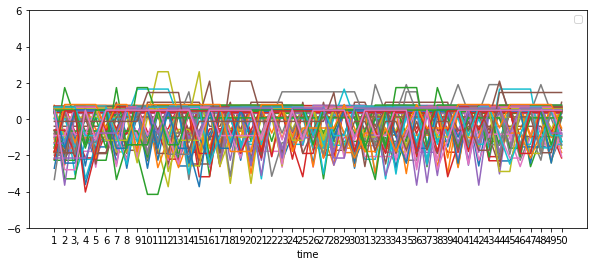

In [171]:
#cluster 0
show_cluster_dist(0)

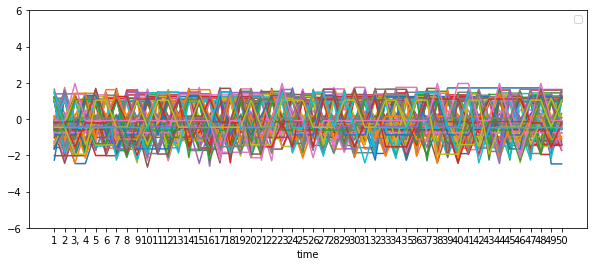

In [172]:
#cluster 1
show_cluster_dist(1)

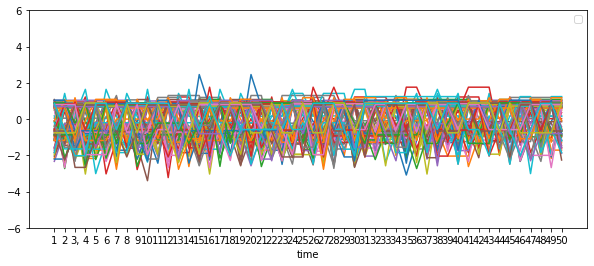

In [173]:
#cluster 2
show_cluster_dist(2)

In [174]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(easy_fx.iloc[:,1:51], easy_fx['km3cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0033


In [175]:
# Inertia 출력
print(f'Inertia: { model.inertia_}')

Inertia: 14.48346190228362


(-3.0, 3.0)

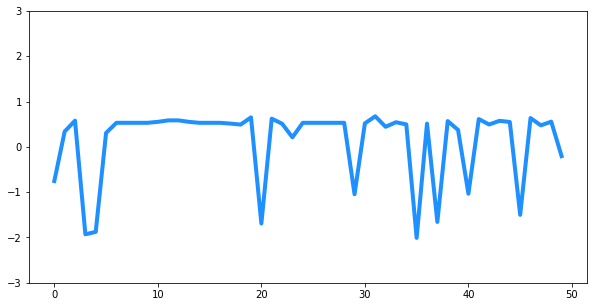

In [176]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[0], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

(-3.0, 3.0)

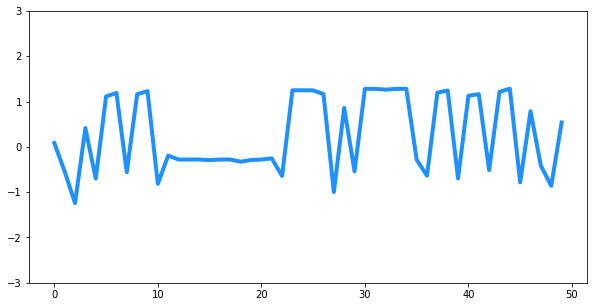

In [177]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[1], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

(-3.0, 3.0)

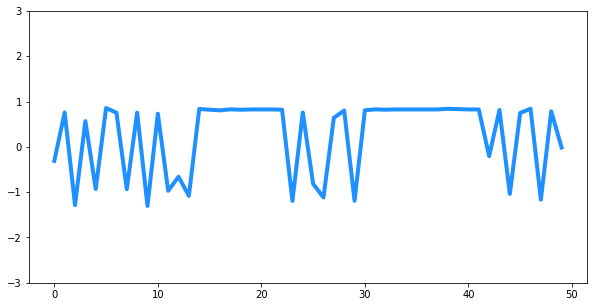

In [178]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[2], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

### - 요약통계량 확인

In [311]:
easy_f = pd.read_csv('/content/gdrive/MyDrive/teamA/클러스터링 결과/final_easy_fx_km3.csv')
easy_f.drop(columns = ['Unnamed: 0'], inplace = True)

In [312]:
hf0 = easy_f[easy_f['km3cluster']==0] #클러스터 0
hf1 = easy_f[easy_f['km3cluster']==1] #클러스터 1
hf2 = easy_f[easy_f['km3cluster']==2] #클러스터 2

##### 클러스터0

In [313]:
aa = hf0.iloc[:,1:-1] #a1~a50 나오게 인덱스 조절!
aa

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
1,2,2,2,2,2,2,2,2,1,2,...,2,2,2,0,0,1,2,2,2,2
3,0,1,0,2,1,1,2,0,2,2,...,2,1,1,2,1,1,2,2,1,0
15,2,2,2,2,2,2,2,2,2,1,...,2,2,2,2,1,2,0,1,2,2
19,0,0,2,2,2,2,1,2,2,0,...,1,1,2,2,2,2,2,2,2,2
29,2,1,1,2,2,1,2,2,1,2,...,0,2,0,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2,2,2,1,2,2,0,1,1,1,...,2,2,2,2,2,2,2,2,1,2
373,1,2,2,0,1,2,2,2,2,2,...,1,2,2,2,2,1,2,2,2,2
374,0,0,0,0,1,1,1,2,2,2,...,2,2,2,2,1,2,2,2,1,1
377,1,1,1,1,1,1,1,1,1,2,...,1,0,0,2,2,2,2,2,2,2


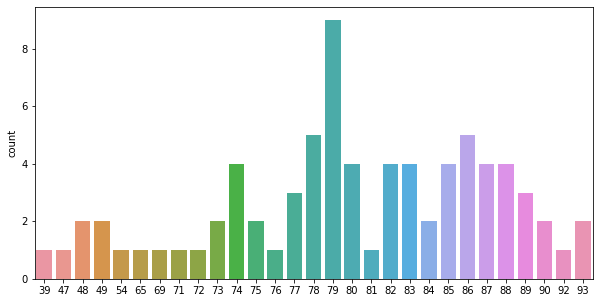

In [314]:
plt.figure(figsize = (10, 5))
sns.countplot(aa.sum(1))

In [315]:
aa.sum(1).mean() #평균 sum

78.37662337662337

In [316]:
aa.sum(1).describe()

count    77.000000
mean     78.376623
std      11.361337
min      39.000000
25%      76.000000
50%      80.000000
75%      86.000000
max      93.000000
dtype: float64

In [317]:
as_1 = aa.std(1)
as_1

1      0.699854
3      0.786623
15     0.631163
19     0.784805
29     0.702474
         ...   
365    0.527218
373    0.451754
374    0.732900
377    0.633745
382    0.614452
Length: 77, dtype: float64

(-1.0, 2.0)

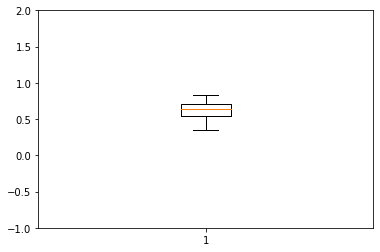

In [318]:
plt.boxplot(as_1)
plt.ylim(-1,2)

In [319]:
as_1.describe()

count    77.000000
mean      0.634446
std       0.113561
min       0.350510
25%       0.545482
50%       0.640153
75%       0.707107
max       0.838852
dtype: float64

In [320]:
aa.sum(1).std()

11.361336746128073

In [321]:
bb = hf1.iloc[:,1:-1]
bb

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
4,1,0,1,0,0,0,1,1,1,1,...,0,0,2,2,2,0,2,0,2,0
5,1,0,0,1,1,2,1,1,1,1,...,2,2,2,2,2,1,1,1,2,2
7,1,1,1,1,1,2,1,2,1,2,...,2,2,0,2,0,2,1,2,2,2
9,1,2,1,1,2,1,1,2,2,1,...,1,2,1,2,2,1,2,2,2,2
18,0,1,0,1,1,2,2,0,1,0,...,2,2,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2,2,2,1,1,1,1,1,0,1,...,2,1,1,2,1,1,1,1,2,1
367,2,2,2,1,2,1,2,1,1,1,...,2,0,0,0,2,0,0,0,0,0
375,1,1,1,1,1,1,1,1,1,0,...,0,2,0,2,2,1,1,0,2,2
376,1,2,1,2,1,1,1,0,1,0,...,2,2,2,2,2,2,2,1,2,2


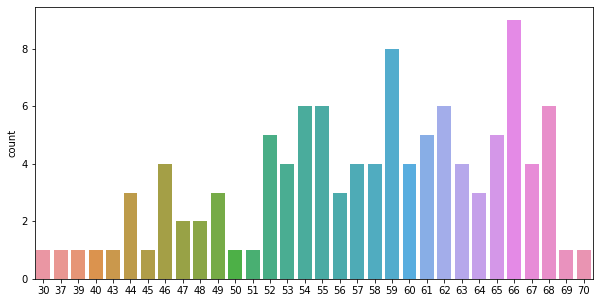

In [322]:
plt.figure(figsize = (10, 5))
sns.countplot(bb.sum(1))

##### 클러스터1

In [323]:
bb.sum(1).mean() 

57.35454545454545

In [324]:
bs_1 = bb.std(1)
bs_1

4      0.788954
5      0.710274
7      0.545482
9      0.453557
18     0.829064
         ...   
364    0.736511
367    0.778276
375    0.711710
376    0.591090
378    0.585888
Length: 110, dtype: float64

In [325]:
bs_1.describe()

count    110.000000
mean       0.680827
std        0.113348
min        0.424264
25%        0.591779
50%        0.697514
75%        0.760969
max        0.952976
dtype: float64

(-1.0, 2.0)

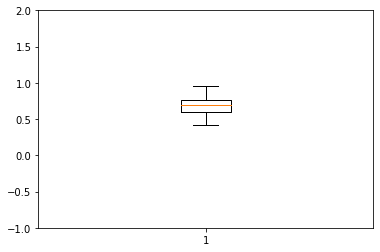

In [326]:
plt.boxplot(bs_1)
plt.ylim(-1,2)

In [327]:
bb.sum(1).std()

8.041847388785765

##### 클러스터2

In [328]:
cc = hf2.iloc[:,1:-1]
cc

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,2,0,2,1,0,2,0,0,1,2,...,1,2,1,2,0,2,2,0,1,2
2,2,2,0,1,1,2,2,2,2,1,...,1,2,2,0,2,1,1,2,0,2
6,2,0,1,0,1,2,2,2,1,2,...,1,2,1,2,2,2,2,2,1,1
8,0,0,1,2,0,0,2,0,0,2,...,2,2,0,0,2,1,1,1,1,1
10,2,2,2,2,2,2,2,2,0,2,...,1,1,2,2,2,1,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,1,1,1,1,2,1,1,1,2,0,...,1,1,1,1,2,1,0,1,0,0
372,1,2,1,0,0,1,1,1,1,2,...,1,2,1,2,0,0,0,2,2,2
379,0,2,1,0,2,1,2,1,1,1,...,2,1,0,2,1,1,2,1,1,2
380,2,0,2,2,0,1,1,0,1,1,...,1,0,2,2,2,2,2,2,2,2


In [329]:
cc.sum(1)

0      56
2      73
6      72
8      49
10     64
       ..
371    68
372    68
379    66
380    69
381    72
Length: 196, dtype: int64

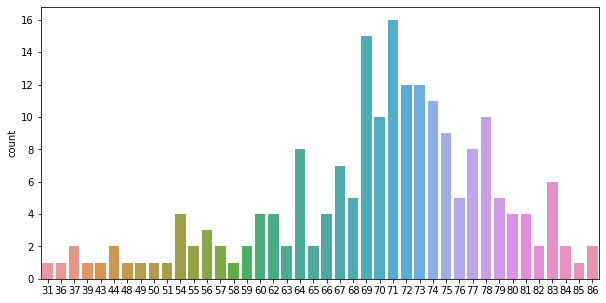

In [330]:
plt.figure(figsize = (10, 5))
sns.countplot(cc.sum(1))

In [331]:
cc.sum(1).mean()

69.51020408163265

In [332]:
cs_1 = cc.std(1)
cs_1

0      0.872248
2      0.734291
6      0.643967
8      0.844913
10     0.701020
         ...   
371    0.749422
372    0.749422
379    0.712569
380    0.725343
381    0.643967
Length: 196, dtype: float64

In [333]:
cs_1.describe()

count    196.000000
mean       0.694116
std        0.106836
min        0.453557
25%        0.612705
50%        0.699854
75%        0.761577
max        0.982292
dtype: float64

(-1.0, 2.0)

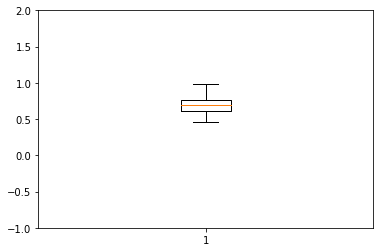

In [334]:
plt.boxplot(cs_1)
plt.ylim(-1,2)

In [335]:
cc.sum(1).mean()

69.51020408163265

## 고난이도

### - 데이터 전처리 및 스케일링

In [179]:
hard_fx.drop(columns = ['Unnamed: 0'], inplace = True)
hard_fx.dropna(inplace=True)
hard_fx.head(3)

,student_id,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,I100008,4,0,3,0,0,3,0,3,0,...,3,0,0,3,0,3,0,0,3,0
1,I101947,3,4,4,3,0,3,4,3,0,...,3,3,3,0,3,0,0,0,3,3
2,I108485,3,3,0,3,3,3,0,3,0,...,0,3,3,3,0,3,3,3,0,4


In [180]:
X=hard_fx.iloc[:,1:51]
X

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,4,0,3,0,0,3,0,3,0,3,...,3,0,0,3,0,3,0,0,3,0
1,3,4,4,3,0,3,4,3,0,3,...,3,3,3,0,3,0,0,0,3,3
2,3,3,0,3,3,3,0,3,0,3,...,0,3,3,3,0,3,3,3,0,4
3,3,3,3,3,3,3,3,4,0,4,...,3,4,4,4,3,3,0,0,3,0
4,3,0,0,0,3,4,3,0,4,3,...,0,3,3,0,0,3,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0,3,0,3,3,0,3,3,0,3,...,0,4,4,4,0,4,3,0,3,3
379,4,3,3,0,0,3,0,3,3,4,...,3,0,0,0,3,3,0,0,0,3
380,0,3,3,3,3,3,0,3,3,3,...,3,3,3,3,3,3,3,3,3,3
381,0,4,3,3,0,3,4,3,3,3,...,3,3,3,0,3,4,4,3,0,3


In [181]:
#스케일링
Xt=TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(hard_fx.iloc[:,1:])

In [182]:
#확인
Xt[0]

array([[ 1.38247634],
       [-1.06438444],
       [ 0.77076115],
       [-1.06438444],
       [-1.06438444],
       [ 0.77076115],
       [-1.06438444],
       [ 0.77076115],
       [-1.06438444],
       [ 0.77076115],
       [-1.06438444],
       [ 0.77076115],
       [ 1.38247634],
       [-1.06438444],
       [-1.06438444],
       [-1.06438444],
       [ 0.77076115],
       [ 1.38247634],
       [ 1.38247634],
       [ 0.77076115],
       [ 1.38247634],
       [ 0.77076115],
       [-1.06438444],
       [-1.06438444],
       [-1.06438444],
       [ 1.38247634],
       [ 0.77076115],
       [-1.06438444],
       [ 0.77076115],
       [-1.06438444],
       [ 0.77076115],
       [ 0.77076115],
       [-1.06438444],
       [ 0.77076115],
       [-1.06438444],
       [ 0.77076115],
       [-1.06438444],
       [ 0.77076115],
       [ 0.77076115],
       [ 0.77076115],
       [ 0.77076115],
       [-1.06438444],
       [-1.06438444],
       [ 0.77076115],
       [-1.06438444],
       [ 0

In [183]:
#스케일링
Xt=TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(X)

### KMeans 클러스터링

3개의 클러스터로 설정하여 클러스터링 진행했습니다.

In [184]:
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=100, random_state = 22)
model.fit(Xt)
#걸린시간: 1시간

TimeSeriesKMeans(max_iter=100, metric='dtw', random_state=22)

In [185]:
pred_kmeans3=model.predict(Xt)

In [186]:
hard_fx['km3cluster'] = model.labels_

In [187]:
#데이터 저장
hard_fx.to_csv('/content/gdrive/MyDrive/teamA/클러스터링 결과/final_hard_fx_km3.csv')

### -클러스터 시각화

In [188]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
n_cluster=3
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(pred_kmeans3)[i])

Text(0.5, 1.2, 'Cluster Distribution')

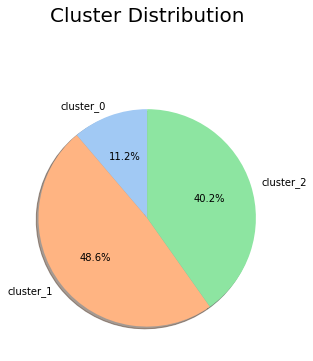

In [189]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:3]
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',colors=colors)
plt.title("Cluster Distribution",position=(0.5,1.2),fontsize=20)

In [190]:
def show_cluster_dist(num_cluster,num_sample=100 ):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['1','2','3,','4','5','6','7','8','9','10','11','12','13','14','15','16',
              '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
              '31', '32', '33', '34',' 35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
              '45', '46', '47', '48', '49', '50'],np.array(Xt[[pred_kmeans3==num_cluster]][i]))
  plt.xlabel("time")
  plt.legend()
  plt.ylim(-6,6)
  plt.show()

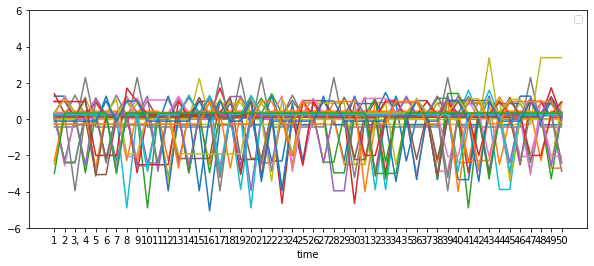

In [191]:
#cluster 0
show_cluster_dist(0)

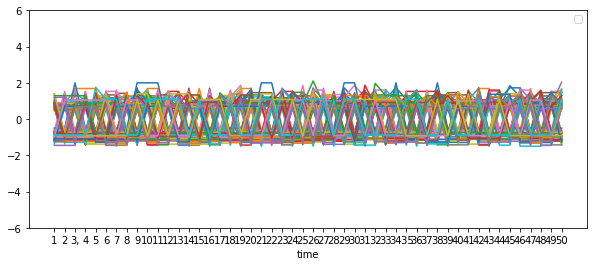

In [192]:
#cluster 1
show_cluster_dist(1)

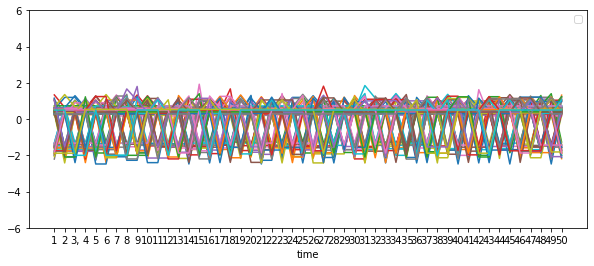

In [193]:
#cluster 2
show_cluster_dist(2)

In [194]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(hard_fx.iloc[:,1:51], hard_fx['km3cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: -0.0240


In [195]:
# Inertia 출력
print(f'Inertia: { model.inertia_}')

Inertia: 10.972071468767584


(-3.0, 3.0)

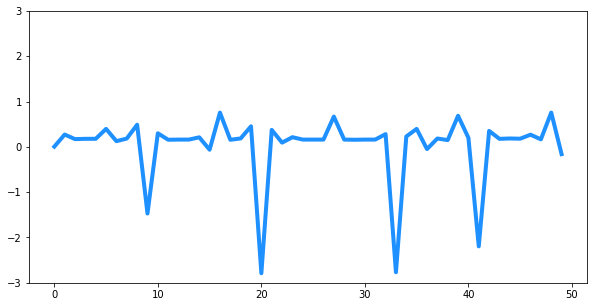

In [196]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[0], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

(-3.0, 3.0)

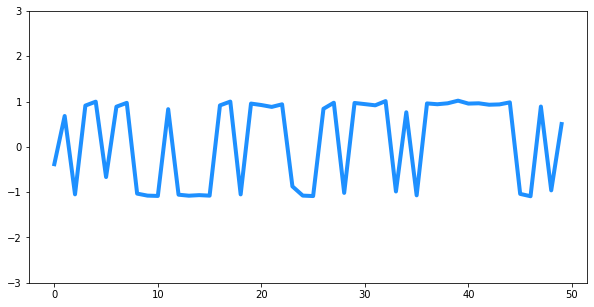

In [197]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[1], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

(-3.0, 3.0)

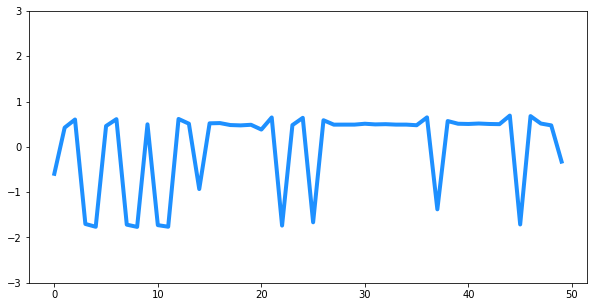

In [198]:
plt.figure(figsize = (10,5))
plt.plot(model.cluster_centers_[2], color = 'dodgerblue', linewidth = 4)
plt.ylim(-3, 3)

### - 요약통계량 확인

In [336]:
hard_f = pd.read_csv('/content/gdrive/MyDrive/teamA/클러스터링 결과/final_hard_fx_km3.csv')
hard_f.drop(columns = ['Unnamed: 0'], inplace = True)

In [337]:
hf0 = hard_f[hard_f['km3cluster']==0] #클러스터 0
hf1 = hard_f[hard_f['km3cluster']==1] #클러스터 1
hf2 = hard_f[hard_f['km3cluster']==2] #클러스터 2

##### 클러스터0

In [338]:
aa = hf0.iloc[:,1:-1] #a1~a50 나오게 인덱스 조절!
aa

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
7,3,0,3,3,3,3,0,3,3,3,...,4,4,4,4,4,4,3,4,4,3
9,3,3,3,3,3,3,3,3,3,3,...,4,4,4,0,3,3,3,4,3,4
17,3,0,0,3,3,3,3,3,3,3,...,0,3,3,3,3,3,0,3,3,3
27,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,4,3
28,3,3,3,3,3,3,3,3,3,4,...,3,3,0,3,3,3,0,3,3,0
34,3,3,3,3,0,0,3,4,3,4,...,3,3,0,3,3,3,4,3,3,3
45,3,3,3,3,3,3,3,3,3,4,...,4,3,3,3,0,3,0,4,3,3
48,0,0,0,3,0,0,0,0,3,0,...,0,0,0,0,0,0,3,0,0,0
53,3,3,3,3,3,3,3,3,3,3,...,3,3,4,3,3,3,3,4,4,4
57,3,3,3,3,3,3,3,3,3,3,...,4,3,3,0,0,3,3,3,3,3


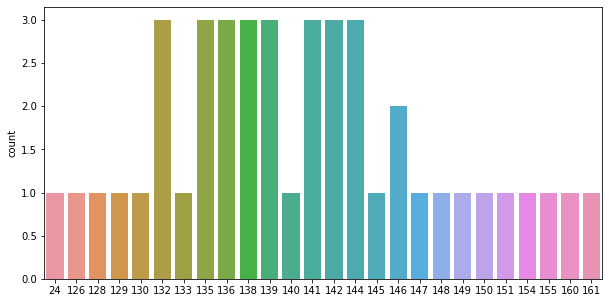

In [339]:
plt.figure(figsize = (10, 5))
sns.countplot(aa.sum(1))

In [340]:
aa.sum(1).mean() #평균 sum

138.2093023255814

In [341]:
aa.sum(1).describe()

count     43.000000
mean     138.209302
std       19.575930
min       24.000000
25%      135.000000
50%      140.000000
75%      145.500000
max      161.000000
dtype: float64

In [342]:
as_1 = aa.std(1)
as_1

7      1.275195
9      1.185112
17     1.147313
27     0.633745
28     0.974993
34     0.989743
45     0.979171
48     1.110984
53     0.274048
57     0.738448
61     0.638877
96     1.117760
97     0.593846
100    0.926701
138    0.719694
140    1.262327
167    1.079682
182    0.719694
188    1.194545
189    0.738448
206    0.840068
207    1.110984
209    0.926701
218    1.154229
219    1.102132
223    1.178030
224    0.974993
225    0.888934
228    0.891914
244    0.593846
247    0.719694
268    0.984782
294    0.857143
297    1.359021
318    1.079682
329    0.931315
330    1.263135
360    1.102132
364    1.342553
368    0.959592
373    0.909137
376    0.815413
380    0.909137
dtype: float64

(-1.0, 2.0)

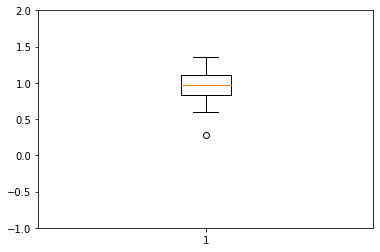

In [343]:
plt.boxplot(as_1)
plt.ylim(-1,2)

In [344]:
as_1.describe()

count    43.000000
mean      0.958021
std       0.230906
min       0.274048
25%       0.827740
50%       0.974993
75%       1.114372
max       1.359021
dtype: float64

In [345]:
aa.sum(1).std()

19.575930482701605

In [346]:
bb = hf1.iloc[:,1:-1]
bb

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,4,0,3,0,0,3,0,3,0,3,...,3,0,0,3,0,3,0,0,3,0
4,3,0,0,0,3,4,3,0,4,3,...,0,3,3,0,0,3,3,3,3,0
8,3,0,0,0,3,3,3,3,0,3,...,3,0,0,0,0,0,0,0,0,3
11,0,0,0,0,0,0,0,3,3,3,...,3,0,0,3,0,0,0,0,0,0
18,0,0,3,3,0,3,3,3,3,3,...,3,0,4,0,3,3,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0,0,0,3,3,3,3,3,3,3,...,0,0,0,0,4,4,4,4,3,3
375,0,3,0,0,3,0,3,3,4,0,...,0,0,0,0,0,3,3,3,3,3
377,0,0,3,3,3,0,3,3,3,0,...,4,4,4,3,4,0,0,3,3,4
378,0,3,0,3,3,0,3,3,0,3,...,0,4,4,4,0,4,3,0,3,3


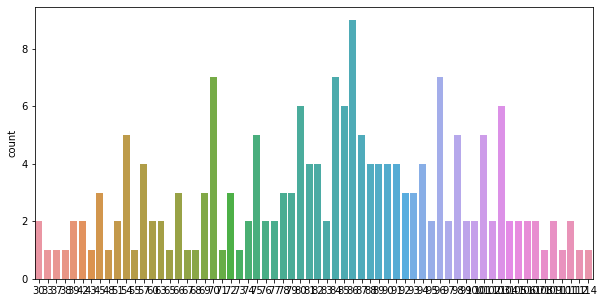

In [347]:
plt.figure(figsize = (10, 5))
sns.countplot(bb.sum(1))

##### 클러스터1

In [348]:
bb.sum(1).mean() 

81.60752688172043

In [349]:
bs_1 = bb.std(1)
bs_1

0      1.651345
4      1.530106
8      1.495708
11     1.510372
18     1.586808
         ...   
374    1.681229
375    1.519398
377    1.649242
378    1.597958
379    1.558256
Length: 186, dtype: float64

In [350]:
bs_1.describe()

count    186.000000
mean       1.526995
std        0.078726
min        1.212183
25%        1.493967
50%        1.529372
75%        1.567951
max        1.744496
dtype: float64

(-1.0, 2.0)

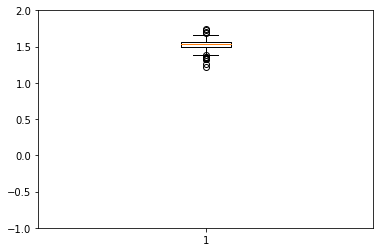

In [351]:
plt.boxplot(bs_1)
plt.ylim(-1,2)

In [352]:
bb.sum(1).std()

18.549910681268987

##### 클러스터2

In [353]:
cc = hf2.iloc[:,1:-1]
cc

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
1,3,4,4,3,0,3,4,3,0,3,...,3,3,3,0,3,0,0,0,3,3
2,3,3,0,3,3,3,0,3,0,3,...,0,3,3,3,0,3,3,3,0,4
3,3,3,3,3,3,3,3,4,0,4,...,3,4,4,4,3,3,0,0,3,0
5,4,3,3,0,3,3,3,3,4,3,...,3,3,3,0,3,3,3,3,0,3
6,3,3,3,3,3,3,3,3,3,3,...,0,3,0,3,4,0,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0,0,3,0,3,3,3,0,3,3,...,3,3,3,3,4,3,3,4,3,3
371,0,0,0,3,0,0,3,3,3,0,...,0,3,3,3,3,3,3,3,3,3
372,3,3,3,3,0,0,3,3,3,3,...,0,4,4,4,4,4,4,4,4,4
381,0,4,3,3,0,3,4,3,3,3,...,3,3,3,0,3,4,4,3,0,3


In [354]:
cc.sum(1)

1      111
2      112
3      130
5      104
6      125
      ... 
366    111
371     93
372    107
381    111
382    138
Length: 154, dtype: int64

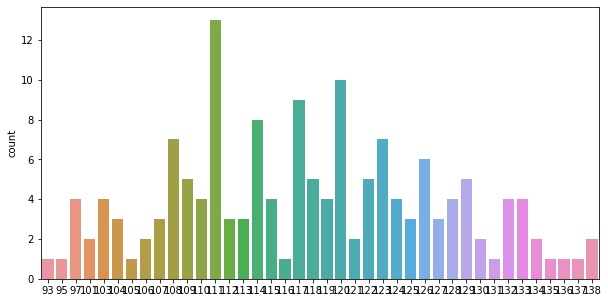

In [355]:
plt.figure(figsize = (10, 5))
sns.countplot(cc.sum(1))

In [356]:
cc.sum(1).mean()

117.44805194805195

In [357]:
cs_1 = cc.std(1)
cs_1

1      1.502243
2      1.348620
3      1.456863
5      1.454620
6      1.297564
         ...   
366    1.418392
371    1.470943
372    1.738050
381    1.502243
382    1.393278
Length: 154, dtype: float64

In [358]:
cs_1.describe()

count    154.000000
mean       1.365664
std        0.128673
min        1.051529
25%        1.274114
50%        1.373567
75%        1.456302
max        1.738050
dtype: float64

(-1.0, 2.0)

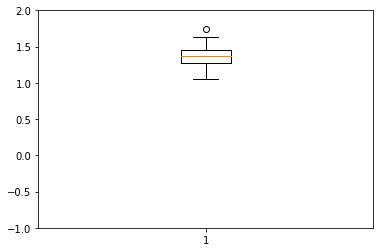

In [359]:
plt.boxplot(cs_1)
plt.ylim(-1,2)

In [360]:
cc.sum(1).mean()

117.44805194805195